# Project Planning

## Goal:

The goal is to find ways to improve the Zestimate so that it more accurately reflects the actual sale price. This will be done by determining which variables affect logerror and to what extent.|

## Deliverables:

1. A report that will summarize my findings in regards to how to improve the Zestimate.
2. A notebook that will show the work I did to reach my findings. It will be made available so that my work can be reproduced if desired.

## Data Dictionary:

- `logerror` - The log of the difference between the property's Zestimate and the actual sale price.
- `bathroomcnt` - The number of bathrooms (with halves) if the property is a home.
- `bedroomcnt` - The number of bedrooms (with halves) if the property is a home.
- `calculatedfinishedsquarefeet` - The calculated finished living area if the property is a home.
- `fullbathcnt` - Number of bathrooms that have a sink, shower, bathtub, and toilet.
- `garagecarcnt` - Total number of garages on lot.
- `roomcnt` - Total number of rooms.
- `yearbuilt` - Year that the first home was built.
- `taxvaluedollarcnt` - The total tax assessed.
- `taxamount` - The property tax assessed for that year.
- `regionidzip` - Zipcode of where the property is located.


## Brainstorming/Hypotheses:

##### What can be causing inaccurate estimates? 
- Any inaccuracies due to these variables can be due to how much value is being placed on a variable. Perhaps `yearbuilt` doesn't matter too much but it is given more weight in the estimate than it should have.
- Perhaps a variable isn't being accounted for, like the condition of the property. Vice versa, maybe a variable shouldn't be included in the valuation.

##### Do any of these variables stand out?

Initial impressions are that `taxamount` will be important in minimizing error since it is based on a valuation of the property itself. `garagecarcnt` is something that can vary in regards to importance to buyer. Due to this, it can lead to error when trying to accurately estimate what a property is worth.

##### Do any independent variables relate to each other?

`roomcnt` and `bedroomcnt` must relate to each other since they are both room counts (`bathroomcnt` can be included in that). `roomcnt` and `calculatedfinishedsquarefeet` can also have a correlation. `taxvaluedollarcnt` and `taxamount` may also be correlated.

##### Any additional features to consider?

I think having data on the following features and using them in the valuation of a property might help make the Zestimate more accurate:
- condition of property
- have a way to account for the amount of time the property has been on sale


# Data Acquisition

### Imports

In [1]:
%matplotlib inline
# from env import user, password, host, get_connection, describe_tables
import numpy as np

# Acquisition
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring
import scipy.stats as stats

# Modeling
import statsmodels.api as sm

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.feature_selection import f_regression
from env import path


Collecting data from `properties_2016.csv` and learning what it looks like.

In [2]:
all_zillow = pd.read_csv(path + 'properties_2016.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
all_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [4]:
properties = all_zillow[['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'
#                          , 'regionidzip'
                        ]]
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 10 columns):
parcelid                        int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
garagecarcnt                    float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
dtypes: float64(9), int64(1)
memory usage: 227.8 MB


Looking at nulls.

In [5]:
properties.isna().sum()

parcelid                              0
bathroomcnt                       11462
bedroomcnt                        11450
calculatedfinishedsquarefeet      55565
fullbathcnt                      128912
garagecarcnt                    2101950
roomcnt                           11475
yearbuilt                         59928
taxvaluedollarcnt                 42550
taxamount                         31250
dtype: int64

Checking for duplicates in the `parcelid` column.

In [6]:
properties.parcelid.value_counts()

12584959    1
12755709    1
12751611    1
12753658    1
12747513    1
12749560    1
12776183    1
12778230    1
12772085    1
12774132    1
12767987    1
12770034    1
12763889    1
12729070    1
12722925    1
12724972    1
12718827    1
12720874    1
12714729    1
12743399    1
12745446    1
12757756    1
12761854    1
12741348    1
12759807    1
14016022    1
12820200    1
12427380    1
17066269    1
11446598    1
           ..
10861026    1
10854881    1
10856928    1
10768863    1
10770910    1
10764765    1
10766812    1
10824176    1
10828274    1
10826227    1
10834431    1
12253706    1
12247561    1
12227079    1
12222981    1
12225028    1
12237314    1
12231169    1
12233216    1
10836478    1
10815988    1
10830333    1
10832380    1
10842619    1
10844666    1
10838521    1
10840568    1
10820086    1
10813941    1
12582912    1
Name: parcelid, Length: 2985217, dtype: int64

Reading in the table that contains `logerror`.

In [7]:
error = pd.read_csv('train_2016_v2.csv')
error.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


Looks like there are duplicates in the `parcelid` column. 

In [8]:
error.parcelid.value_counts()

11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
10798910    2
14678446    2
12689560    2
10796614    2
14316410    2
11633771    2
12023571    2
14667297    2
14294516    2
12715657    2
14444102    2
14022812    2
12978851    2
14057417    2
11135845    2
11477350    2
11146377    2
11866315    2
11602482    2
14500952    2
           ..
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12031384    1
14130585    1
12027290    1
12862962    1
12756350    1
17197466    1
11046267    1
10910830    1
14202253    1
11038055    1
11104576    1
17265761    1
12858732    1
14604356    1
12068206    1
14210190    1
14736753    1
14599538    1
14601587    1
14613877    1
11199862    1
11726199    1
12096888    1
11181433    1
12438686    1
Name: parcelid, Length: 90150, dtype: int64

Dropping all duplicate values, including the first instance. This is done so I don't have to take the mean of the `logerrors` or only keep one of the instances, which may affect the end result.

In [9]:
error_no_dup = error.drop_duplicates(subset='parcelid', keep=False)
error_no_dup.parcelid.value_counts()

14406754    1
14674536    1
12893126    1
14710565    1
14187098    1
14316123    1
13910621    1
12737118    1
17283682    1
13079143    1
11088862    1
14686806    1
11663457    1
17156716    1
12567149    1
11701744    1
12438579    1
14367346    1
14627443    1
12087607    1
12325463    1
12071507    1
14701444    1
12104259    1
13070907    1
10832444    1
11237032    1
11658373    1
13849151    1
17214016    1
           ..
11716150    1
11947413    1
14474673    1
14478376    1
11062707    1
13069286    1
17104309    1
11988407    1
11636123    1
12027290    1
14130585    1
12031384    1
12756350    1
12862962    1
17280877    1
10749084    1
11488643    1
12150150    1
11474312    1
17112457    1
11448393    1
11734411    1
12793228    1
10954126    1
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12438686    1
Name: parcelid, Length: 90026, dtype: int64

Joing the two tables together.

In [10]:
joined = properties.join(error_no_dup.set_index('parcelid'), on='parcelid', how='inner')
joined.loc[joined.parcelid == 11842707]

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,transactiondate


In [11]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet      655
fullbathcnt                      1170
garagecarcnt                    60169
roomcnt                             0
yearbuilt                         750
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
transactiondate                     0
dtype: int64

In [12]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,9.002600e+04,90026.000000,90026.000000,89371.000000,88856.000000,29857.000000,90026.000000,89276.000000,9.002500e+04,90020.000000,90026.000000
mean,1.298510e+07,2.279614,3.032002,1773.000448,2.241109,1.812104,1.478628,1968.546149,4.576048e+05,5982.286703,0.011487
std,2.506516e+06,1.003989,1.155785,928.107412,0.963065,0.608969,2.819966,23.763230,5.548190e+05,6838.197701,0.160863
min,1.071174e+07,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155977e+07,2.000000,2.000000,1184.000000,2.000000,2.000000,0.000000,1953.000000,1.990730e+05,2874.420000,-0.025300
50%,1.254749e+07,2.000000,3.000000,1540.000000,2.000000,2.000000,0.000000,1970.000000,3.430000e+05,4543.280000,0.006000
75%,1.422760e+07,3.000000,4.000000,2095.000000,3.000000,2.000000,0.000000,1987.000000,5.405890e+05,6899.450000,0.039200
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,24.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000


Identifying the instances of `roomcnt` that don't make sense (i.e. room count is 0 but the sum of bathroom count and bedroom count is greater than 0.)

In [13]:
joined.loc[(joined.roomcnt == 0) & ((joined.bedroomcnt > 0) | (joined.bathroomcnt > 0)), 'roomcnt'] = 100

In [14]:
joined.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
garagecarcnt                    float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
logerror                        float64
transactiondate                  object
dtype: object

Creating another column that contains a `1` if the instance's `roomcnt` doesn't makes sense, `0` otherwise.

In [15]:
def room_fix(i):
    if i == 100:
        return 1
    else:
        return 0

joined['nonsense_room'] = joined.roomcnt.apply(room_fix)

joined.loc[(joined.roomcnt == 100) & ((joined.bedroomcnt > 0) | (joined.bathroomcnt > 0)), 'roomcnt'] = 0

joined.sample(20)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,transactiondate,nonsense_room
2417818,12801721,2.0,2.0,1203.0,2.0,NaN,0.0,1950.0,85271.0,4552.35,-0.0545,2016-03-17,1
2465919,14412247,3.0,3.0,2467.0,3.0,2.0,0.0,1987.0,424543.0,8699.92,0.1706,2016-02-17,1
57942,14718121,2.5,2.0,1270.0,2.0,1.0,0.0,1988.0,215478.0,2268.88,0.0080,2016-02-23,1
825706,12489024,2.0,2.0,1644.0,2.0,NaN,0.0,1950.0,76860.0,1040.89,0.0218,2016-09-27,1
2369585,11846102,1.0,2.0,1425.0,1.0,NaN,0.0,1963.0,424606.0,5671.99,0.0516,2016-01-25,1
820764,11109615,2.0,3.0,1188.0,2.0,NaN,0.0,1964.0,389350.0,5359.05,-0.0212,2016-04-29,1
1955912,12461808,1.0,3.0,1012.0,1.0,NaN,0.0,1944.0,310000.0,5736.44,-0.0336,2016-10-10,1
1942540,12819061,2.0,4.0,1600.0,2.0,NaN,0.0,1964.0,324896.0,4375.77,0.0159,2016-06-23,1
374735,11172933,1.0,2.0,806.0,1.0,NaN,0.0,1963.0,105533.0,1691.61,0.0139,2016-04-14,1
2544612,10911758,6.0,5.0,3564.0,6.0,NaN,0.0,2007.0,1694013.0,20730.25,0.0109,2016-03-07,1


Creating a variable for how old the property is in years.

In [16]:
joined['age_of_property'] = 2019 - joined.yearbuilt

In [17]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet      655
fullbathcnt                      1170
garagecarcnt                    60169
roomcnt                             0
yearbuilt                         750
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
transactiondate                     0
nonsense_room                       0
age_of_property                   750
dtype: int64

Filling in some values for `caluclatedfinishedsquarefeet` where it makes sense to do so. In this case, filling in nulls with a `0` where bathroom count and bedroom count are both `0`, signaling the property is just a lot with no finished square feet to calculate.

In [18]:
joined.loc[(joined.calculatedfinishedsquarefeet.isnull()) 
            & (joined.bathroomcnt == float(0))
            & (joined.bedroomcnt == float(0)), 'calculatedfinishedsquarefeet'] = 0


In [19]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet        9
fullbathcnt                      1170
garagecarcnt                    60169
roomcnt                             0
yearbuilt                         750
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
transactiondate                     0
nonsense_room                       0
age_of_property                   750
dtype: int64

Filling in nulls in `garagecarcnt`.

In [20]:
joined.loc[(joined.garagecarcnt.isnull()) 
            & (joined.bathroomcnt == float(0))
            & (joined.bedroomcnt == float(0)), 'garagecarcnt'] = 0

In [21]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet        9
fullbathcnt                      1170
garagecarcnt                    59240
roomcnt                             0
yearbuilt                         750
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
transactiondate                     0
nonsense_room                       0
age_of_property                   750
dtype: int64

`garagecarcnt` is still majority null values. `transactiondate` won't be used as a variable. Both are dropped.

In [22]:
joined.drop(['garagecarcnt', 'transactiondate'], axis=1, inplace=True)
joined.sample(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property
427671,14052564,2.5,5.0,2072.0,2.0,7.0,1968.0,300358.0,3548.82,0.0402,0,51.0
741947,14683615,3.0,3.0,1329.0,3.0,0.0,1989.0,332156.0,4258.14,0.0325,1,30.0
1595440,11543426,2.0,3.0,1383.0,2.0,0.0,1937.0,128268.0,1872.21,-0.0481,1,82.0
1077197,12230754,2.0,4.0,1258.0,2.0,0.0,1924.0,186548.0,2831.20,0.0402,1,95.0
56680,14292515,2.5,2.0,1221.0,2.0,5.0,1979.0,535489.0,6358.26,-0.0020,0,40.0
1994005,17296369,1.0,2.0,1044.0,1.0,4.0,1974.0,702000.0,11170.40,0.0469,0,45.0
1422807,13000376,3.0,3.0,1206.0,3.0,0.0,1981.0,270651.0,4152.00,0.0050,1,38.0
933002,14009808,2.0,3.0,2168.0,2.0,0.0,1951.0,309905.0,3924.48,-0.0856,1,68.0
1931899,14718598,2.0,2.0,975.0,2.0,0.0,1989.0,220454.0,2276.60,0.0421,1,30.0
2135665,12789166,4.0,4.0,2150.0,4.0,0.0,1958.0,214307.0,2965.30,-0.0694,1,61.0


Filling in null values for `bathroomcnt`.

In [23]:
joined.loc[(joined.bathroomcnt == float(0)) & (joined.bedroomcnt == float(0)) & (joined.fullbathcnt.isna()), 'fullbathcnt'] = 0
joined.isna().sum()

parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet      9
fullbathcnt                      39
roomcnt                           0
yearbuilt                       750
taxvaluedollarcnt                 1
taxamount                         6
logerror                          0
nonsense_room                     0
age_of_property                 750
dtype: int64

Dropping remaining instances with null values.

In [24]:
joined_nonull = joined.dropna(subset=['yearbuilt', 'taxvaluedollarcnt', 'taxamount',
#                                       'regionidzip',
                                      'calculatedfinishedsquarefeet', 'fullbathcnt', 'age_of_property'])
joined_nonull.count()

parcelid                        89228
bathroomcnt                     89228
bedroomcnt                      89228
calculatedfinishedsquarefeet    89228
fullbathcnt                     89228
roomcnt                         89228
yearbuilt                       89228
taxvaluedollarcnt               89228
taxamount                       89228
logerror                        89228
nonsense_room                   89228
age_of_property                 89228
dtype: int64

In [25]:
joined_nonull.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fullbathcnt                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
logerror                        0
nonsense_room                   0
age_of_property                 0
dtype: int64

Making new features. `better_room` is a better calculation for room count where bedroom count and bathroom count are summed. `abs_logerror` is absolute value of `logerror`. `sqft_per_room` is finished square feet divided by better room count.

In [26]:
joined_nonull['better_room'] = joined_nonull.bathroomcnt + joined_nonull.bedroomcnt
joined_nonull['abs_logerror'] = joined_nonull.logerror.apply(abs)
joined_nonull['sqft_per_room'] = joined_nonull.calculatedfinishedsquarefeet/joined_nonull.better_room

joined_nonull.dropna(subset=['sqft_per_room'], inplace=True)
joined_nonull.loc[joined_nonull.sqft_per_room == np.inf]

joined_nonull = joined_nonull[joined_nonull.sqft_per_room != np.inf]

joined_nonull.loc[joined_nonull.sqft_per_room == np.inf]

joined_nonull.describe()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.876100e+04,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000,8.876100e+04,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000
mean,1.297166e+07,2.308829,3.069400,1768.256329,2.240781,1.494913,1968.596658,4.576034e+05,5971.806703,0.011514,0.769572,50.403342,5.378229,0.067344,325.019028
std,2.509153e+06,0.975502,1.109113,923.818565,0.962431,2.830752,23.766292,5.535487e+05,6805.208788,0.158283,0.421109,23.766292,1.875664,0.143704,89.872913
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.155480e+07,2.000000,2.000000,1182.000000,2.000000,0.000000,1953.000000,2.005000e+05,2882.700000,-0.025300,1.000000,32.000000,4.000000,0.013900,264.166667
50%,1.254238e+07,2.000000,3.000000,1537.000000,2.000000,0.000000,1970.000000,3.436850e+05,4545.460000,0.006000,1.000000,49.000000,5.000000,0.032500,307.636364
75%,1.421907e+07,3.000000,4.000000,2088.000000,3.000000,0.000000,1987.000000,5.405890e+05,6892.340000,0.038300,1.000000,66.000000,6.000000,0.068600,366.909091
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000,134.000000,26.000000,4.737000,3790.166667


Making a list of the columns in the DataFrame.

In [27]:
colnames = joined_nonull.columns
colnames

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'logerror', 'nonsense_room', 'age_of_property', 'better_room',
       'abs_logerror', 'sqft_per_room'],
      dtype='object')

Making a list of the independent variables.

In [28]:
attributes = colnames[1:].drop('logerror')
attributes

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'nonsense_room', 'age_of_property', 'better_room', 'abs_logerror',
       'sqft_per_room'],
      dtype='object')

Our independent variable is logerror. It is continuous.

Boxplots and histograms of all the variables to get a better idea of their distributions.

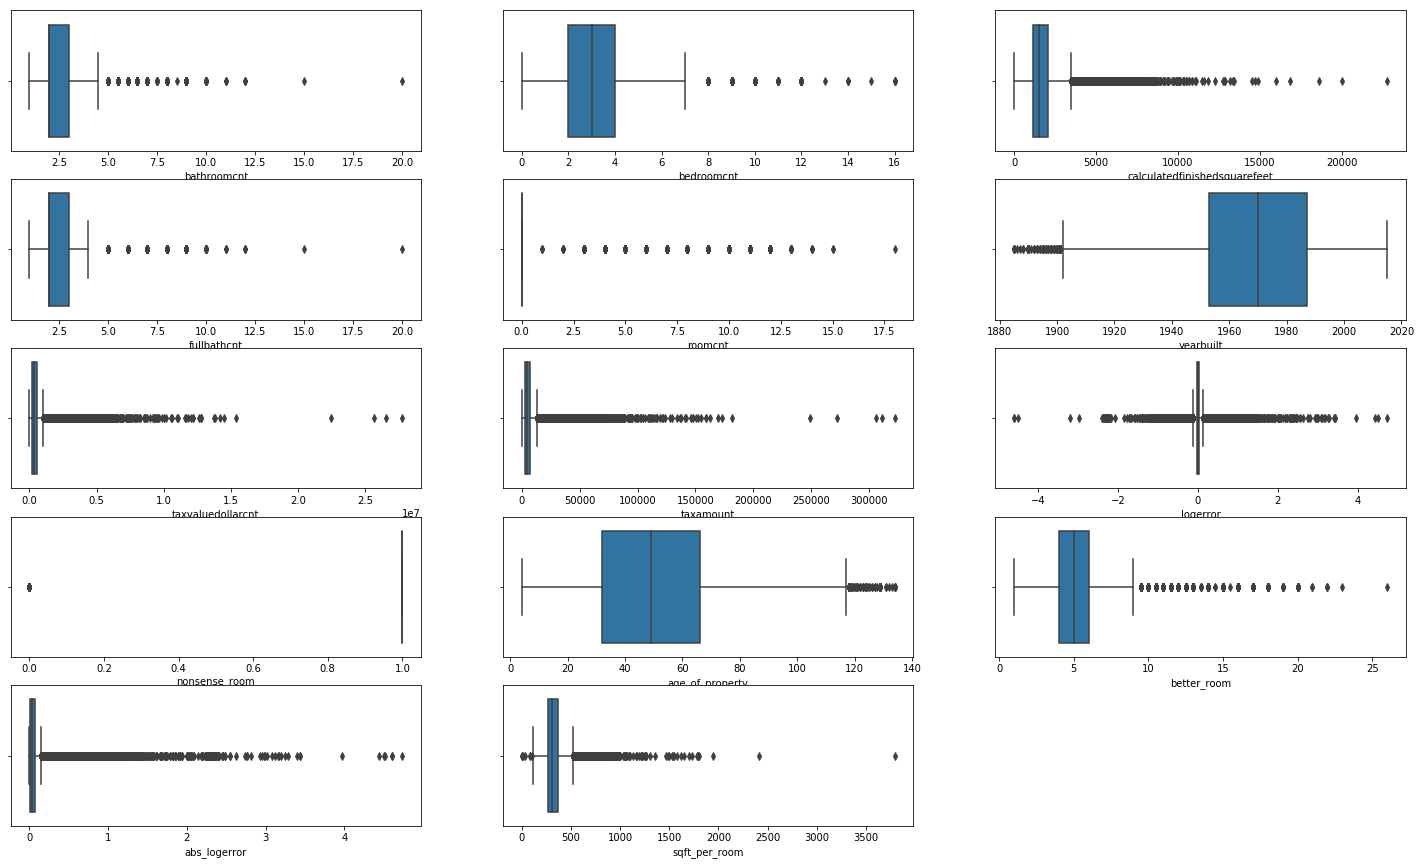

In [29]:
plt.figure(figsize=(25,15))

for i, column in enumerate(joined_nonull.drop('parcelid', axis=1)):
    plt.subplot(5, 3, (i+1))
    sns.boxplot(joined_nonull[column])
    
plt.show()

# Data Exploration

Splitting the data into separate train and test sets.

In [30]:
X = joined_nonull.drop(['parcelid', 'logerror', 'abs_logerror'], axis=1)
y = joined_nonull[['abs_logerror']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.60)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(53256, 12)
(53256, 1)
(35505, 12)
(35505, 1)


In [33]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

print(train.shape)
print(test.shape)


(53256, 13)
(35505, 13)


What is the relationship between the different variables like?

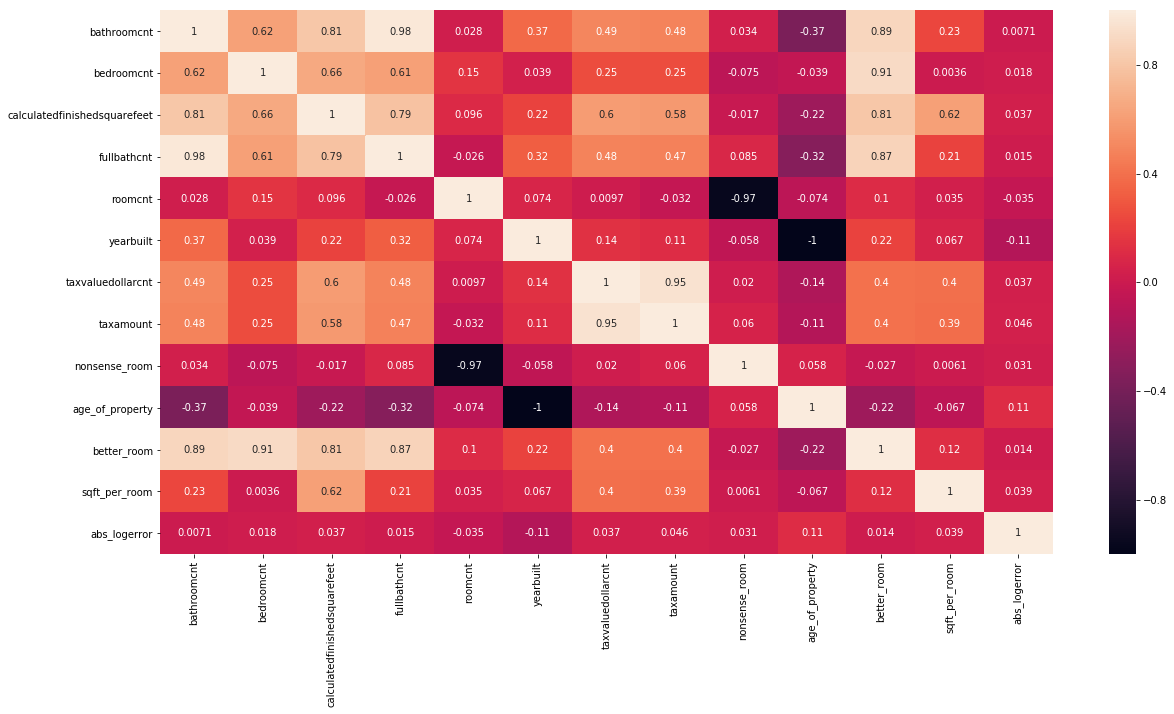

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True)

Create jointplots for all independent variables and `logerror`.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

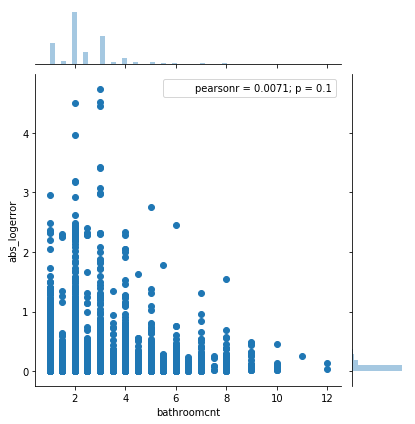

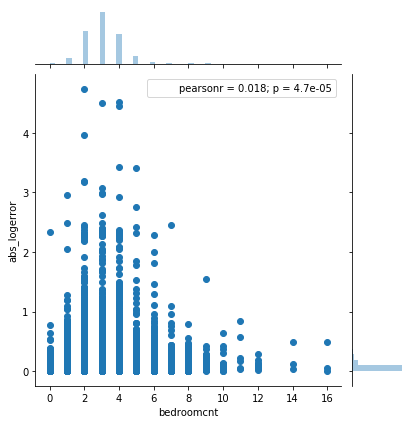

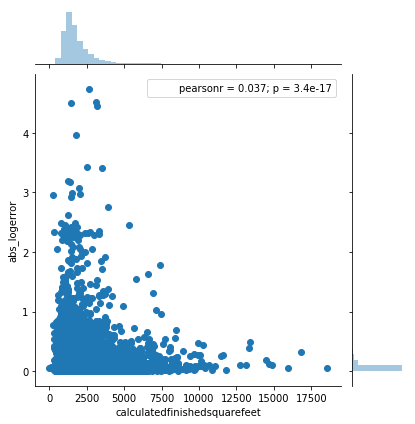

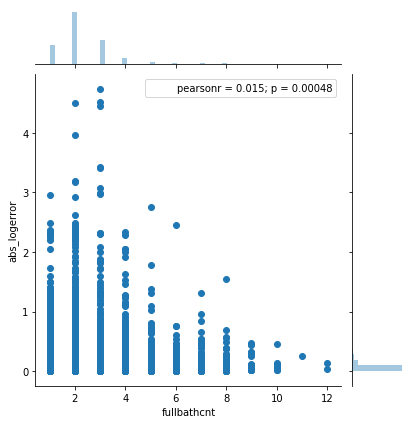

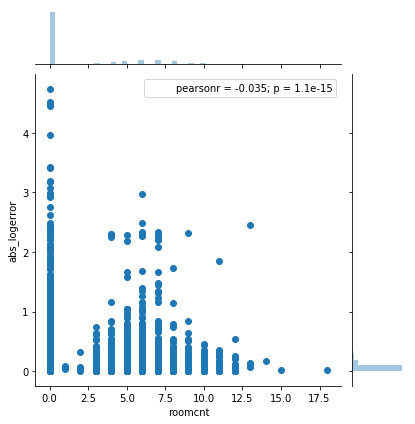

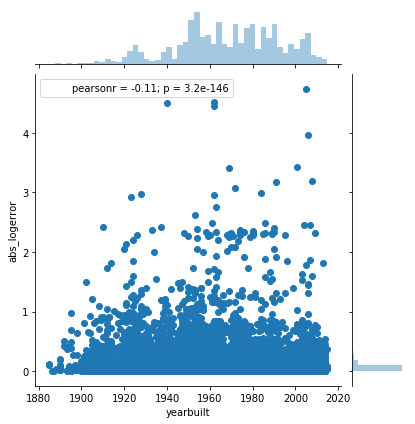

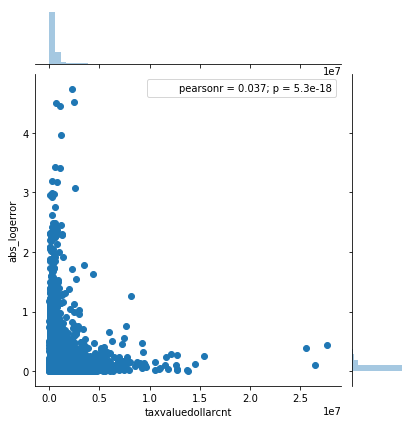

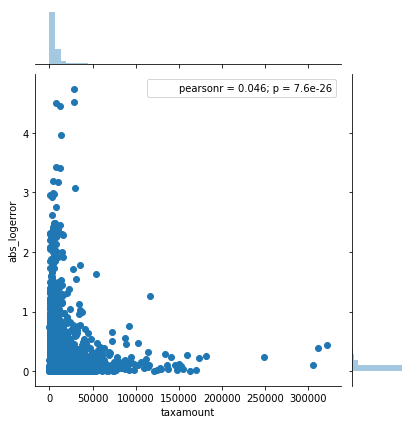

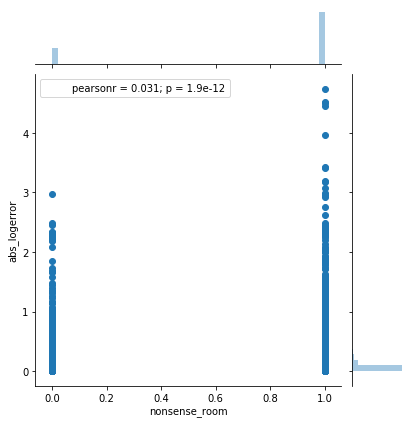

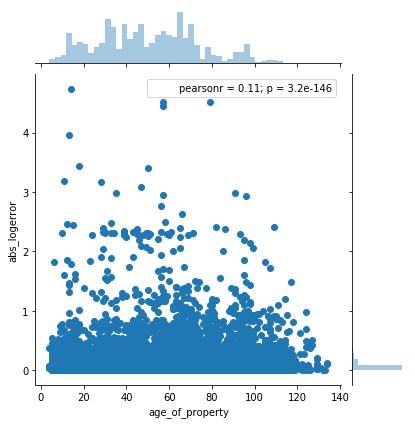

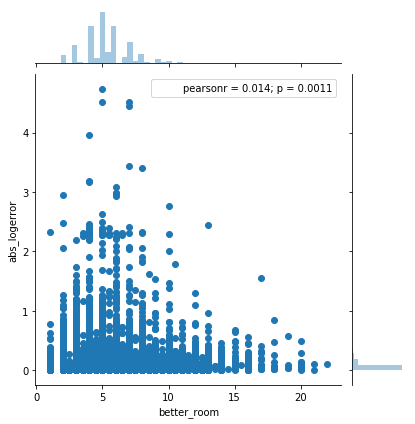

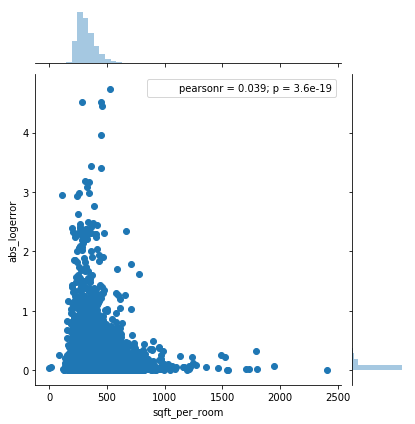

In [35]:
for column in X_train:
    sns.jointplot(X_train[column], y_train['abs_logerror']).annotate(stats.pearsonr)

<Figure size 1440x1440 with 0 Axes>

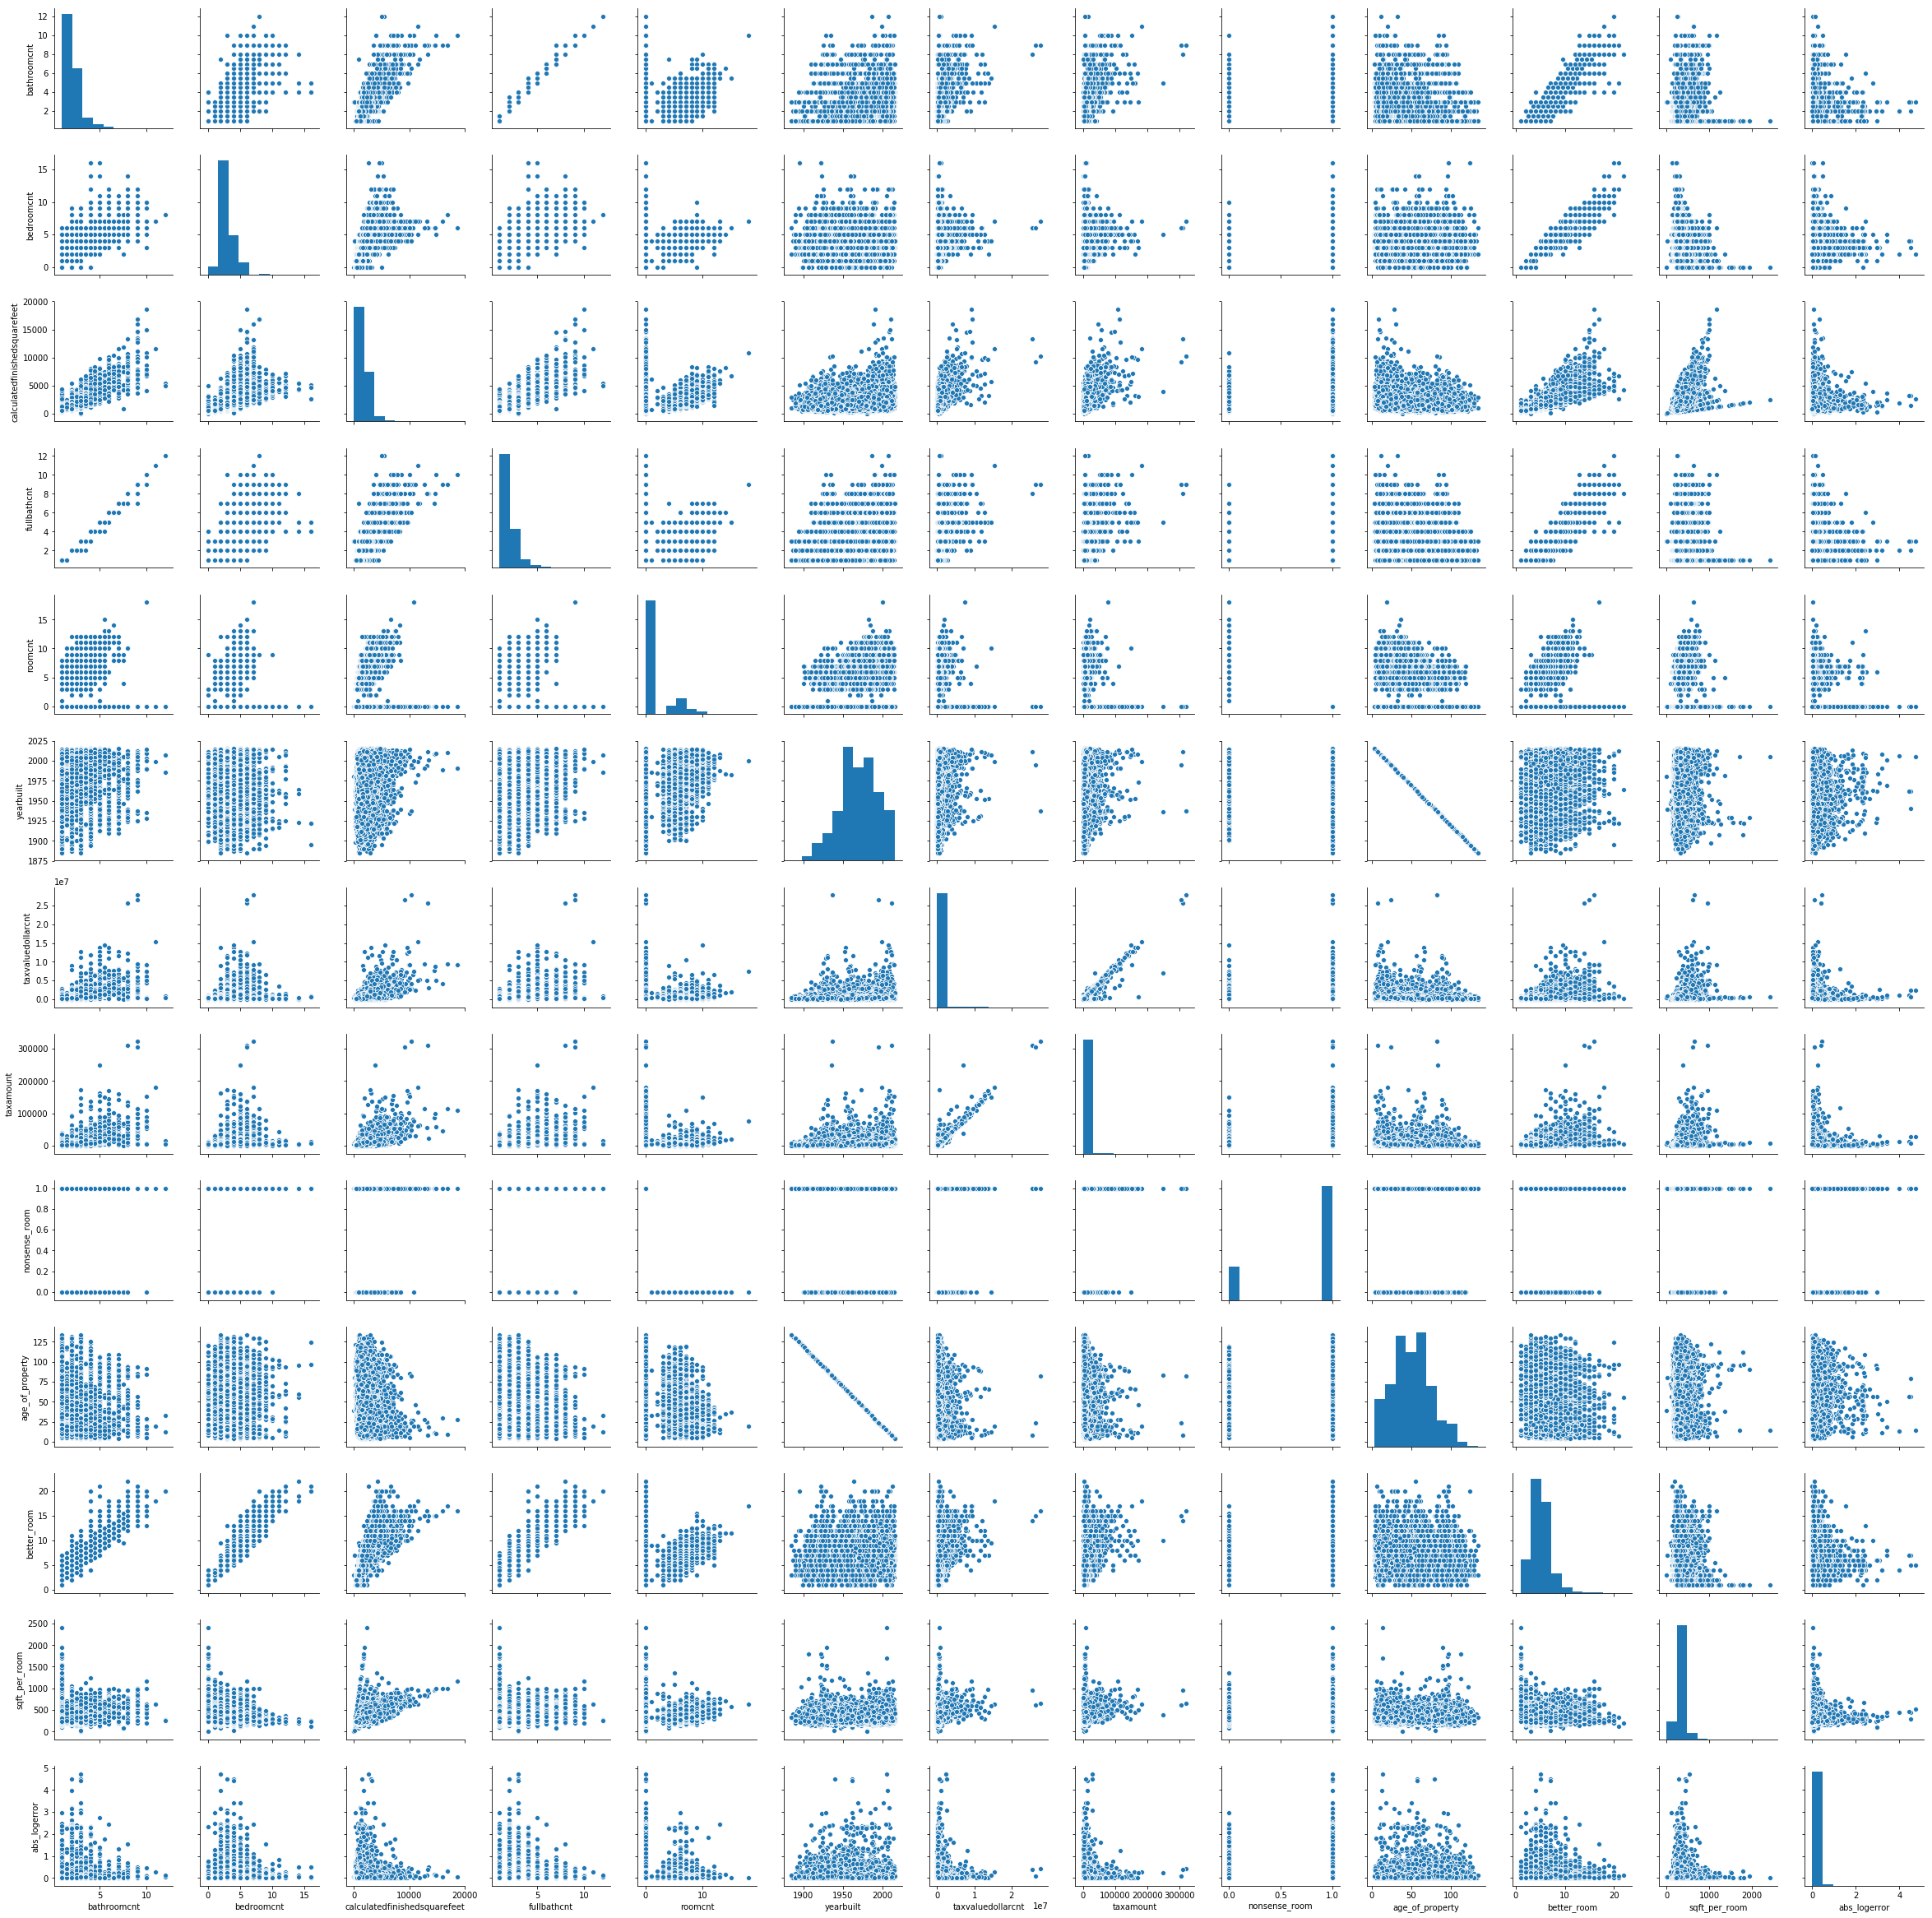

In [36]:
plt.figure(figsize=(20,20))
sns.pairplot(train)

After looking at the plots (heatmap, jointplots, pairplots), it doesn't seem like any of the independent variables have much of a correlation to `logerror`. This may be due to the data that was removed due to null values or potential outliers. After the initial regression model is made, further wrok can be done constructing models that ignore exclude outliers or include some of the attributes that were omitted. As for correlation between the independent variables, there is a strong correlation between `taxamount` and `taxvaluedollarcnt`. There is also a high correlation between `bathroomcnt` and `fullbathcnt`. `calculatedfinishedsquarefeet` has a correlation with the room count variables as well as the tax variables. After seeing these plots and the correlations, I think I will have to consider including other variables after creating this initial linear model.

In [37]:
X_train.dtypes

bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
nonsense_room                     int64
age_of_property                 float64
better_room                     float64
sqft_per_room                   float64
dtype: object

Is there a difference in `logerror` between properties with 3 bathrooms vs. 5 or more bathrooms?

In [38]:
def print_ttest_results(ttest, alpha=0.05):
    print(f'The p-value is : {ttest[1]}')
    if ttest[1] < alpha:
        print('There is a significant difference.')
    else:
        print('Not significant.')

threebath =train.loc[train.bathroomcnt == 3]
threebath.sample(10)

fivebath = train.loc[train.bathroomcnt >= 5]
fivebath.sample(10)

print_ttest_results(ttest_ind(threebath.abs_logerror, fivebath.abs_logerror))

The p-value is : 7.339438311614499e-25
There is a significant difference.


Is there a difference in `logerror` between properties with 1500 finished squarefeet and more than 5000 finished square feet?

In [39]:
fifteenhunsf = train.loc[train.calculatedfinishedsquarefeet == 1500]

fivethoussf = train.loc[train.calculatedfinishedsquarefeet >= 5000]

print_ttest_results(ttest_ind(fifteenhunsf.abs_logerror, fivethoussf.abs_logerror))

The p-value is : 0.0022555109202846554
There is a significant difference.


Is there a difference in `logerror` between properties with 3 bedrooms and those with 5 or more bedrooms?

In [40]:
threebed = train.loc[train.bedroomcnt == 3]

fivebed = train.loc[train.bedroomcnt >= 5]

print_ttest_results(ttest_ind(threebed.abs_logerror, fivebed.abs_logerror))

The p-value is : 2.2665012077261373e-25
There is a significant difference.


# Data Modeling

Feature engineering was performed earlier in the notebook since some dropped columns were needed to create those features.

Assessing what variables are important to the model by performing an ordinary least squares regression of all variables.

In [41]:
ols_model_1 = sm.OLS(y_train, X_train)
fit = ols_model_1.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           abs_logerror   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     102.9
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          1.21e-212
Time:                        20:54:10   Log-Likelihood:                 28007.
No. Observations:               53256   AIC:                        -5.599e+04
Df Residuals:                   53245   BIC:                        -5.590e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                     -0.0060      0.003     -2.143      0.032      -0.011      -0.001
bedroomcnt                       0.0009      0.002      0.612      0.540      -0.002       0.004
calculatedfinishedsquarefeet  1.341e-05   2.76e-06      4.855      0.000    7.99e-06    1.88e-05
fullbathcnt                      0.0117      0.004      2.980      0.003       0.004       0.019
roomcnt                         -0.0055      0.001     -6.042      0.000      -0.007      -0.004
yearbuilt                     2.482e-05   3.94e-06      6.305      0.000    1.71e-05    3.25e-05
taxvaluedollarcnt            -9.835e-09   3.59e-09     -2.742      0.006   -1.69e-08   -2.81e-09
taxamount                     1.201e-06   2.87e-07      4.189      0.000    6.39e-07    1.76e-06
nonsense_room                   -0.0300      0.006     -5.016      0.000      -0.042      -0.018
age_of_property                  0.0008   2.96e-05     26.262      0.000       0.001       0.001
better_room                     -0.0050      0.002     -3.351      0.001      -0.008      -0.002
sqft_per_room                -1.318e-05   1.56e-05     -0.844      0.399   -4.38e-05    1.74e-05
==============================================================================
Omnibus:                    87213.601   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         86146664.213
Skew:                          10.872   Prob(JB):                         0.00
Kurtosis:                     198.830   Cond. No.                     2.17e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Testing if there is a difference between the group that has a sensical room count and those that don't. It seems that there is a difference by looking at the plots.

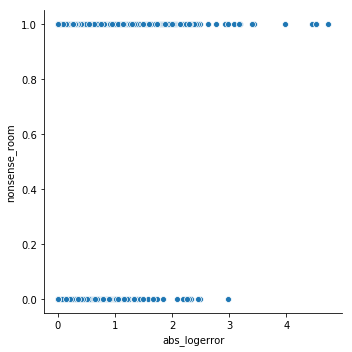

In [42]:
sns.relplot(data=train, x='abs_logerror', y='nonsense_room') 

In [43]:
sensical_data = joined_nonull.loc[joined_nonull.nonsense_room == 0]
nonsense = joined_nonull.loc[joined_nonull.nonsense_room == 1]

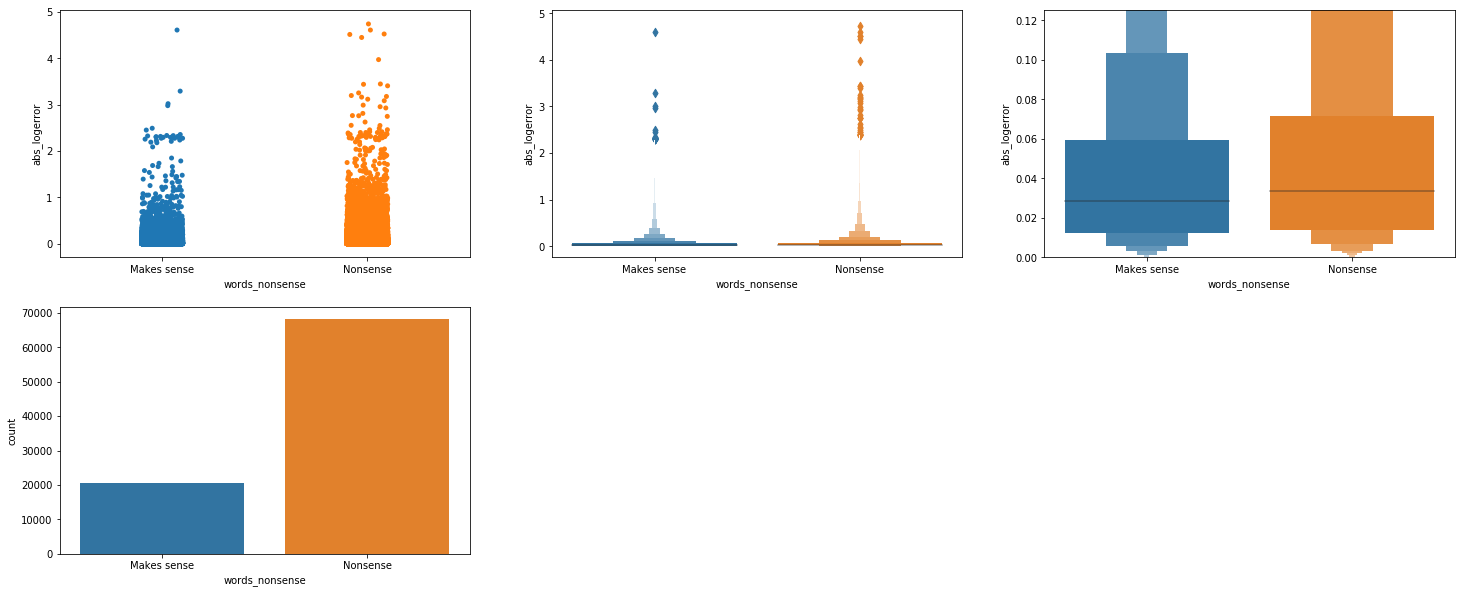

In [44]:
joined_nonull['words_nonsense'] = joined_nonull.nonsense_room.apply(lambda x: 'Nonsense' if x == 1 else 'Makes sense')
# sns.jointplot('words_nonsense', 'abs_logerror', data=train)

plt.figure(figsize=(25,10))


plt.subplot(231)
sns.stripplot('words_nonsense', 'abs_logerror', data=joined_nonull)

plt.subplot(232)
sns.boxenplot('words_nonsense', 'abs_logerror', data=joined_nonull)

plt.subplot(233)
sns.boxenplot('words_nonsense', 'abs_logerror', data=joined_nonull)
plt.ylim(0, 0.125)

plt.subplot(234)
sns.countplot('words_nonsense', data=joined_nonull)

# train.drop('words_nonsense', axis=1)

In [45]:
sensical_data.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,2.045300e+04,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,2.045300e+04,20453.000000,20453.000000,20453.0,20453.000000,20453.000000,20453.000000,20453.000000
mean,1.530178e+07,2.253581,3.225786,1802.581528,2.096954,6.487557,1971.253899,4.372784e+05,5210.677210,0.012547,0.0,47.746101,5.479367,0.059531,324.333837
std,3.963648e+06,0.764425,0.929642,811.437920,0.738784,1.544282,15.837356,4.430746e+05,4885.242091,0.149058,0.0,15.837356,1.510578,0.137229,82.870535
min,1.165035e+07,1.000000,0.000000,257.000000,1.000000,1.000000,1891.000000,7.837000e+03,49.080000,-4.605000,0.0,5.000000,1.000000,0.000000,85.666667
25%,1.409758e+07,2.000000,3.000000,1262.000000,2.000000,5.000000,1962.000000,2.152900e+05,2715.040000,-0.020200,0.0,40.000000,4.500000,0.012100,267.000000
50%,1.438804e+07,2.000000,3.000000,1605.000000,2.000000,6.000000,1971.000000,3.586130e+05,4382.700000,0.006000,0.0,48.000000,5.500000,0.028400,308.571429
75%,1.712601e+07,2.500000,4.000000,2140.000000,2.000000,8.000000,1979.000000,5.328500e+05,6301.780000,0.036300,0.0,57.000000,6.500000,0.059200,364.000000
max,1.629608e+08,10.000000,10.000000,10850.000000,9.000000,18.000000,2014.000000,1.449943e+07,150608.720000,3.289000,0.0,128.000000,17.000000,4.605000,1575.000000


In [46]:
nonsense.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,6.830800e+04,68308.000000,68308.000000,68308.000000,68308.000000,68308.0,68308.000000,6.830800e+04,68308.000000,68308.000000,68308.0,68308.000000,68308.000000,68308.000000,68308.000000
mean,1.227396e+07,2.325372,3.022574,1757.978568,2.283847,0.0,1967.801019,4.636892e+05,6199.706532,0.011205,1.0,51.198981,5.347946,0.069684,325.224190
std,1.168142e+06,1.029753,1.153338,954.663868,1.015951,0.0,25.614795,5.824307e+05,7266.811405,0.160942,0.0,25.614795,1.970874,0.145506,91.865394
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.0,1885.000000,2.200000e+01,126.280000,-4.605000,1.0,4.000000,1.000000,0.000000,0.666667
25%,1.130477e+07,2.000000,2.000000,1156.000000,2.000000,0.0,1950.000000,1.965818e+05,2931.210000,-0.027400,1.0,30.000000,4.000000,0.014100,263.454545
50%,1.208345e+07,2.000000,3.000000,1516.000000,2.000000,0.0,1969.000000,3.386330e+05,4600.925000,0.006000,1.0,50.000000,5.000000,0.033600,307.285714
75%,1.282731e+07,3.000000,4.000000,2069.000000,3.000000,0.0,1989.000000,5.436600e+05,7146.010000,0.039200,1.0,69.000000,6.000000,0.071500,367.750000
max,1.730082e+07,20.000000,16.000000,22741.000000,20.000000,0.0,2015.000000,2.775000e+07,321936.090000,4.737000,1.0,134.000000,26.000000,4.737000,3790.166667


In [47]:
def print_ttest_results(ttest, alpha=0.05):
    print(f'The p-value is : {ttest[1]}')
    if ttest[1] < alpha:
        print('There is a significant difference.')
    else:
        print('Not significant.')

print_ttest_results(ttest_ind(sensical_data.abs_logerror, nonsense.abs_logerror))

The p-value is : 7.572256003128766e-19
There is a significant difference.


## Linear Model 1

In [48]:
lm1 = LinearRegression()

In [49]:
lm1.fit(X_train[['calculatedfinishedsquarefeet']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
lm1_train_pred = lm1.predict(X_train[['calculatedfinishedsquarefeet']])

In [51]:
MSE = mean_squared_error(y_train, lm1_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm1_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm1_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.02081942254154307
Median absolute error is: 0.0454956001324114
R^2 is: 0.001334622189580359


`calculatedfinishedsquarefeet` on it's own is not a very good predictor.

## Linear Model 2

In [52]:
lm2 = LinearRegression()
lm2.fit(X_train[['taxamount']], y_train)
lm2_train_pred = lm2.predict(X_train[['taxamount']])

MSE = mean_squared_error(y_train, lm2_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm2_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm2_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.020804028045089983
Median absolute error is: 0.04549410846146596
R^2 is: 0.0020730648906613913


`taxamount` is a slightly better.

## Linear Model 3

In [53]:
lm3 = LinearRegression()
lm3.fit(X_train[['bathroomcnt']], y_train)
lm3_train_pred = lm3.predict(X_train[['bathroomcnt']])

MSE = mean_squared_error(y_train, lm3_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm3_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm3_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.020846192960263073
Median absolute error is: 0.04590784446979464
R^2 is: 5.0499622212929474e-05


Bathroom count is particularly bad.

## Linear Model 4

In [54]:
lm4 = LinearRegression()
lm4.fit(X_train[['roomcnt']], y_train)
lm4_train_pred = lm4.predict(X_train[['roomcnt']])

MSE = mean_squared_error(y_train, lm4_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm4_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm4_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.020822122395074562
Median absolute error is: 0.04536564089964887
R^2 is: 0.001205115703909132


`roomcnt` is not that great.

## Linear Model 5

In [128]:
lm5 = LinearRegression()
lm5.fit(X_train[['nonsense_room']], y_train)
lm5_train_pred = lm5.predict(X_train[['nonsense_room']])

MSE = mean_squared_error(y_train, lm5_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm5_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm5_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.0208278522867153
Median absolute error is: 0.04567065878460569
R^2 is: 0.0009302644495675638


The dummy variable isn't good.

## Linear Model 6

In [56]:
lm6 = LinearRegression()
lm6.fit(X_train[['age_of_property']], y_train)
lm6_train_pred = lm6.predict(X_train[['age_of_property']])

MSE = mean_squared_error(y_train, lm6_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm6_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm6_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.020589274459782876
Median absolute error is: 0.04224416633458271
R^2 is: 0.012374357828970117


Age of property by itself is the best so far.

## Linear Model 7

In [57]:
lm4 = LinearRegression()
lm4.fit(X_train[['sqft_per_room']], y_train)
lm4_train_pred = lm4.predict(X_train[['sqft_per_room']])

lm4int = lm4.intercept_
print(f'intercept is: {lm4int}')

lm4co = lm4.coef_
print(f'coefficient is: {lm4co}')

MSE = mean_squared_error(y_train, lm4_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm4_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm4_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

intercept is: [0.04669021]
coefficient is: [[6.25708247e-05]]
Mean squared error is: 0.0208159122790343
Median absolute error is: 0.04547045653400991
R^2 is: 0.0015030023465006925


R squared drops again.

## Linear Model 8 (start creating multivariate models)

In [58]:
lm1 = LinearRegression()
lm1.fit(X_train[['taxamount', 'calculatedfinishedsquarefeet']], y_train)
lm1_train_pred = lm1.predict(X_train[['taxamount', 'calculatedfinishedsquarefeet']])

MSE = mean_squared_error(y_train, lm1_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm1_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm1_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.020800882263069302
Median absolute error is: 0.04539182390544816
R^2 is: 0.0022239616594802447


Still not that great of a model.

## Linear Model 9

In [59]:
lm2 = LinearRegression()
lm2.fit(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'bathroomcnt']], y_train)
lm2_train_pred = lm2.predict(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'bathroomcnt']])

MSE = mean_squared_error(y_train, lm2_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm2_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm2_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.020769841358644358
Median absolute error is: 0.045033918145557864
R^2 is: 0.0037129307451144733


This mix of variables brings a slight improvement.

## Linear Model 10

In [60]:
lm3 = LinearRegression()
lm3.fit(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'age_of_property']], y_train)
lm3_train_pred = lm3.predict(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'age_of_property']])

MSE = mean_squared_error(y_train, lm3_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm3_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm3_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Mean squared error is: 0.020492763439558536
Median absolute error is: 0.04124142053476172
R^2 is: 0.01700379528252538


This mix of variables, once of which is age of proerty, does well compared to the others.

## Linear Model 11

In [61]:
lm4 = LinearRegression()
lm4.fit(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'age_of_property', 'bedroomcnt', 'better_room']], y_train)
lm4_train_pred = lm4.predict(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'age_of_property', 'bedroomcnt', 'better_room']])

lm4int = lm4.intercept_
print(f'intercept is: {lm4int}')

lm4co = lm4.coef_
print(f'coefficient is: {lm4co}')

MSE = mean_squared_error(y_train, lm4_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm4_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm4_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

intercept is: [0.01483526]
coefficient is: [[ 5.59478102e-07  8.79973892e-06  3.12018675e-03  7.99770785e-04
  -3.66229609e-03 -5.42109333e-04]]
Mean squared error is: 0.020482251263094744
Median absolute error is: 0.041210877873730026
R^2 is: 0.01750804301844966


## Linear Model 12

In [62]:
lm5 = LinearRegression()
lm5.fit(X_train[['taxamount', 'bathroomcnt', 'age_of_property', 'bedroomcnt', 'better_room', 'sqft_per_room']], y_train)
lm5_train_pred = lm5.predict(X_train[['taxamount', 'bathroomcnt', 'age_of_property', 'bedroomcnt', 'better_room', 'sqft_per_room']])

lm5int = lm5.intercept_
print(f'intercept is: {lm5int}')

lm5co = lm5.coef_
print(f'coefficient is: {lm5co}')

MSE = mean_squared_error(y_train, lm5_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm5_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm5_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

intercept is: [4.039107e-05]
coefficient is: [[ 6.90989635e-07  4.50470457e-03  7.98529805e-04 -2.97518413e-03
   1.52952043e-03  4.05658129e-05]]
Mean squared error is: 0.020487966394511333
Median absolute error is: 0.041189040014909
R^2 is: 0.017233899782056028


## Linear Model 13

In [63]:
lm6 = LinearRegression()
lm6.fit(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'age_of_property', 'better_room']], y_train)
lm6_train_pred = lm6.predict(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'age_of_property', 'better_room']])

lm6int = lm6.intercept_
print(f'intercept is: {lm6int}')

lm6co = lm6.coef_
print(f'coefficient is: {lm6co}')

MSE = mean_squared_error(y_train, lm6_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm6_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm6_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

intercept is: [0.0175948]
coefficient is: [[ 6.49716830e-07  9.96862055e-06  7.49779905e-04 -1.82098645e-03]]
Mean squared error is: 0.020489123634717672
Median absolute error is: 0.04128455750514528
R^2 is: 0.017178389321783727


## Linear Model 14

In [64]:
lm7 = LinearRegression()
lm7.fit(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'age_of_property', 'better_room', 'nonsense_room']], y_train)
lm7_train_pred = lm7.predict(X_train[['taxamount', 'calculatedfinishedsquarefeet', 'age_of_property', 'better_room', 'nonsense_room']])

lm7int = lm7.intercept_
print(f'intercept is: {lm7int}')

lm7co = lm7.coef_
print(f'coefficient is: {lm7co}')

MSE = mean_squared_error(y_train, lm7_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm7_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm7_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

intercept is: [0.01192356]
coefficient is: [[ 6.02943307e-07  1.01652504e-05  7.42386068e-04 -1.80325967e-03
   7.61710557e-03]]
Mean squared error is: 0.020479014889426928
Median absolute error is: 0.04103273073960163
R^2 is: 0.01766328528442762


This model is th best, but is still not very great. Even though MSE and MAE are low, they are low because our dependent variable is very small.

In [65]:
lm1_train_pred

array([[0.06510928],
       [0.0635569 ],
       [0.06565419],
       ...,
       [0.06270147],
       [0.06403196],
       [0.06124345]])

Comparing the models vs. actual `abs_logerror` values

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

<Figure size 1440x1440 with 0 Axes>

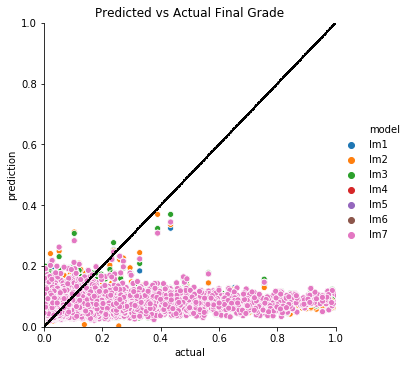

In [66]:
plt.figure(figsize=(20, 20))

pd.DataFrame({'actual': y_train.abs_logerror,
              'lm1': lm1_train_pred.ravel(),
              'lm2': lm2_train_pred.ravel(),
              'lm3': lm3_train_pred.ravel(),
              'lm4': lm4_train_pred.ravel(),
              'lm5': lm4_train_pred.ravel(),
              'lm6': lm4_train_pred.ravel(),
              'lm7': lm4_train_pred.ravel()}).melt(id_vars=['actual'], var_name='model', value_name='prediction').pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')


plt.plot(y_train.abs_logerror, y_train.abs_logerror, c='black', ls=':')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.title('Predicted vs Actual Final Grade')

# Removing outliers

Next, we remove outliers in an attempt to create better performing models.

In [67]:
joined_nonull_2 = joined_nonull

joined_nonull_2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.876100e+04,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000,8.876100e+04,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000,88761.000000
mean,1.297166e+07,2.308829,3.069400,1768.256329,2.240781,1.494913,1968.596658,4.576034e+05,5971.806703,0.011514,0.769572,50.403342,5.378229,0.067344,325.019028
std,2.509153e+06,0.975502,1.109113,923.818565,0.962431,2.830752,23.766292,5.535487e+05,6805.208788,0.158283,0.421109,23.766292,1.875664,0.143704,89.872913
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.155480e+07,2.000000,2.000000,1182.000000,2.000000,0.000000,1953.000000,2.005000e+05,2882.700000,-0.025300,1.000000,32.000000,4.000000,0.013900,264.166667
50%,1.254238e+07,2.000000,3.000000,1537.000000,2.000000,0.000000,1970.000000,3.436850e+05,4545.460000,0.006000,1.000000,49.000000,5.000000,0.032500,307.636364
75%,1.421907e+07,3.000000,4.000000,2088.000000,3.000000,0.000000,1987.000000,5.405890e+05,6892.340000,0.038300,1.000000,66.000000,6.000000,0.068600,366.909091
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000,134.000000,26.000000,4.737000,3790.166667


Outliers will be removed for bathroom count, bedroom count, square feet, year built, and tax value.

In [68]:
joined_nonull_2.loc[joined_nonull_2.bathroomcnt == float(0)]

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room,words_nonsense


In [69]:
joined_nonull_2 = joined_nonull_2.loc[(joined_nonull_2.bathroomcnt <= (3 + (1 * 1.5))) & (joined_nonull_2.bathroomcnt >= (2 - (1 * 1.5)))]

joined_nonull_2.describe()


,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.654100e+04,86541.000000,86541.000000,86541.000000,86541.000000,86541.000000,86541.000000,8.654100e+04,86541.000000,86541.000000,86541.000000,86541.000000,86541.000000,86541.000000,86541.000000
mean,1.298686e+07,2.221288,3.010873,1689.950821,2.154054,1.509146,1968.304168,4.199897e+05,5514.015872,0.010954,0.766261,50.695832,5.232162,0.066342,322.045755
std,2.527025e+06,0.799280,1.029240,744.299004,0.786104,2.827410,23.580340,3.909548e+05,4863.326598,0.156601,0.423210,23.580340,1.619706,0.142277,86.339741
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.156086e+07,2.000000,2.000000,1173.000000,2.000000,0.000000,1953.000000,1.969030e+05,2841.950000,-0.025300,1.000000,33.000000,4.000000,0.013900,263.500000
50%,1.255375e+07,2.000000,3.000000,1517.000000,2.000000,0.000000,1969.000000,3.375120e+05,4469.980000,0.005000,1.000000,50.000000,5.000000,0.031500,306.000000
75%,1.422659e+07,3.000000,4.000000,2028.000000,3.000000,0.000000,1986.000000,5.225510e+05,6689.440000,0.037300,1.000000,66.000000,6.000000,0.067200,363.400000
max,1.629608e+08,4.500000,16.000000,22741.000000,4.000000,13.000000,2015.000000,1.275000e+07,173218.070000,4.737000,1.000000,134.000000,20.000000,4.737000,3790.166667


In [70]:
joined_nonull_2 = joined_nonull_2.loc[(joined_nonull_2.bedroomcnt <= (4 + (2 * 1.5))) & (joined_nonull_2.bedroomcnt >= (2 - (2 * 1.5)))]

joined_nonull_2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.632400e+04,86324.000000,86324.000000,86324.000000,86324.000000,86324.000000,86324.000000,8.632400e+04,86324.000000,86324.000000,86324.000000,86324.000000,86324.000000,86324.000000,86324.000000
mean,1.298925e+07,2.216985,2.997220,1684.993953,2.149588,1.512940,1968.349150,4.197354e+05,5509.398760,0.010945,0.765674,50.650850,5.214205,0.066206,322.109597
std,2.529614e+06,0.795509,0.991941,737.263988,0.781873,2.829947,23.551597,3.909867e+05,4861.726527,0.156446,0.423580,23.551597,1.580341,0.142168,86.366958
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.155990e+07,2.000000,2.000000,1172.000000,2.000000,0.000000,1953.000000,1.966578e+05,2839.915000,-0.025300,1.000000,33.000000,4.000000,0.013900,263.500000
50%,1.255645e+07,2.000000,3.000000,1515.000000,2.000000,0.000000,1970.000000,3.372430e+05,4465.910000,0.005000,1.000000,49.000000,5.000000,0.031500,306.000000
75%,1.422958e+07,3.000000,4.000000,2022.000000,3.000000,0.000000,1986.000000,5.225490e+05,6681.292500,0.037300,1.000000,66.000000,6.000000,0.067200,363.500000
max,1.629608e+08,4.500000,7.000000,22741.000000,4.000000,13.000000,2015.000000,1.275000e+07,173218.070000,4.737000,1.000000,134.000000,11.500000,4.737000,3790.166667


In [71]:
joined_nonull_2 = joined_nonull_2.loc[(joined_nonull_2.calculatedfinishedsquarefeet <= (2022 + ((2022-1172) * 1.5))) & (joined_nonull_2.calculatedfinishedsquarefeet >= (1172 - ((2022-1172) * 1.5)))]

joined_nonull_2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.295300e+04,82953.000000,82953.000000,82953.000000,82953.000000,82953.000000,82953.000000,8.295300e+04,82953.000000,82953.000000,82953.000000,82953.000000,82953.000000,82953.000000,82953.000000
mean,1.297451e+07,2.155347,2.944402,1596.406748,2.092522,1.488891,1967.767145,3.903185e+05,5160.444426,0.010118,0.765904,51.232855,5.099749,0.065336,315.270643
std,2.550117e+06,0.738552,0.960521,589.446484,0.734197,2.780008,23.293927,3.265850e+05,4129.169372,0.154306,0.423435,23.293927,1.486345,0.140157,77.863716
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.155586e+07,2.000000,2.000000,1158.000000,2.000000,0.000000,1953.000000,1.914540e+05,2779.210000,-0.025300,1.000000,34.000000,4.000000,0.013100,261.818182
50%,1.254649e+07,2.000000,3.000000,1486.000000,2.000000,0.000000,1969.000000,3.278730e+05,4347.720000,0.005000,1.000000,50.000000,5.000000,0.031500,302.500000
75%,1.421063e+07,3.000000,4.000000,1939.000000,3.000000,0.000000,1985.000000,4.970000e+05,6382.480000,0.036300,1.000000,66.000000,6.000000,0.066100,355.333333
max,1.629608e+08,4.500000,7.000000,3297.000000,4.000000,12.000000,2015.000000,1.275000e+07,173218.070000,4.737000,1.000000,134.000000,11.000000,4.737000,2410.000000


In [72]:
joined_nonull_2 = joined_nonull_2.loc[(joined_nonull_2.yearbuilt <= (1985 + ((1985-1953) * 1.5))) & (joined_nonull_2.yearbuilt >= (1953 - ((1985-1953) * 1.5)))]

joined_nonull_2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.275200e+04,82752.000000,82752.000000,82752.000000,82752.000000,82752.000000,82752.000000,8.275200e+04,82752.000000,82752.000000,82752.000000,82752.000000,82752.000000,82752.000000,82752.000000
mean,1.297613e+07,2.156570,2.944110,1596.476653,2.093617,1.491481,1967.934008,3.905615e+05,5162.966089,0.010138,0.765516,51.065992,5.100680,0.065183,315.199565
std,2.552616e+06,0.737937,0.959668,589.309423,0.733647,2.781884,23.073224,3.267039e+05,4131.051987,0.154058,0.423678,23.073224,1.485258,0.139956,77.757923
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1905.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.155381e+07,2.000000,2.000000,1159.000000,2.000000,0.000000,1953.000000,1.916878e+05,2781.167500,-0.025300,1.000000,33.000000,4.000000,0.013100,261.800000
50%,1.254727e+07,2.000000,3.000000,1486.000000,2.000000,0.000000,1969.000000,3.280000e+05,4350.730000,0.005000,1.000000,50.000000,5.000000,0.031500,302.444444
75%,1.421202e+07,3.000000,4.000000,1939.000000,3.000000,0.000000,1986.000000,4.971680e+05,6383.742500,0.036300,1.000000,66.000000,6.000000,0.066100,355.250000
max,1.629608e+08,4.500000,7.000000,3297.000000,4.000000,12.000000,2015.000000,1.275000e+07,173218.070000,4.737000,1.000000,114.000000,11.000000,4.737000,2410.000000


In [73]:
joined_nonull_2 = joined_nonull_2.loc[(joined_nonull_2.taxvaluedollarcnt <= (4971680 + ((4971680-191687) * 1.5))) & (joined_nonull_2.taxvaluedollarcnt >= (191687 - ((4971680-191687) * 1.5)))]

joined_nonull_2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.275000e+04,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,8.275000e+04,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000
mean,1.297617e+07,2.156538,2.944109,1596.460459,2.093583,1.491517,1967.934151,3.902696e+05,5159.607375,0.010140,0.765511,51.065849,5.100647,0.065182,315.198624
std,2.552638e+06,0.737912,0.959667,589.305679,0.733619,2.781908,23.073432,3.212675e+05,4074.181568,0.154058,0.423682,23.073432,1.485258,0.139957,77.757843
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1905.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.155381e+07,2.000000,2.000000,1159.000000,2.000000,0.000000,1953.000000,1.916872e+05,2781.102500,-0.025300,1.000000,33.000000,4.000000,0.013100,261.800000
50%,1.254728e+07,2.000000,3.000000,1486.000000,2.000000,0.000000,1969.000000,3.280000e+05,4350.675000,0.005000,1.000000,50.000000,5.000000,0.031500,302.444444
75%,1.421204e+07,3.000000,4.000000,1939.000000,3.000000,0.000000,1986.000000,4.970588e+05,6383.652500,0.036300,1.000000,66.000000,6.000000,0.066100,355.250000
max,1.629608e+08,4.500000,7.000000,3297.000000,4.000000,12.000000,2015.000000,1.179352e+07,173218.070000,4.737000,1.000000,114.000000,11.000000,4.737000,2410.000000


In [74]:
joined_nonull_2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.275000e+04,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,8.275000e+04,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000
mean,1.297617e+07,2.156538,2.944109,1596.460459,2.093583,1.491517,1967.934151,3.902696e+05,5159.607375,0.010140,0.765511,51.065849,5.100647,0.065182,315.198624
std,2.552638e+06,0.737912,0.959667,589.305679,0.733619,2.781908,23.073432,3.212675e+05,4074.181568,0.154058,0.423682,23.073432,1.485258,0.139957,77.757843
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1905.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.155381e+07,2.000000,2.000000,1159.000000,2.000000,0.000000,1953.000000,1.916872e+05,2781.102500,-0.025300,1.000000,33.000000,4.000000,0.013100,261.800000
50%,1.254728e+07,2.000000,3.000000,1486.000000,2.000000,0.000000,1969.000000,3.280000e+05,4350.675000,0.005000,1.000000,50.000000,5.000000,0.031500,302.444444
75%,1.421204e+07,3.000000,4.000000,1939.000000,3.000000,0.000000,1986.000000,4.970588e+05,6383.652500,0.036300,1.000000,66.000000,6.000000,0.066100,355.250000
max,1.629608e+08,4.500000,7.000000,3297.000000,4.000000,12.000000,2015.000000,1.179352e+07,173218.070000,4.737000,1.000000,114.000000,11.000000,4.737000,2410.000000


Splitting into train and test data sets again.

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(49650, 13)
(49650, 1)
(33100, 13)
(33100, 1)
(49650, 14)
(33100, 14)


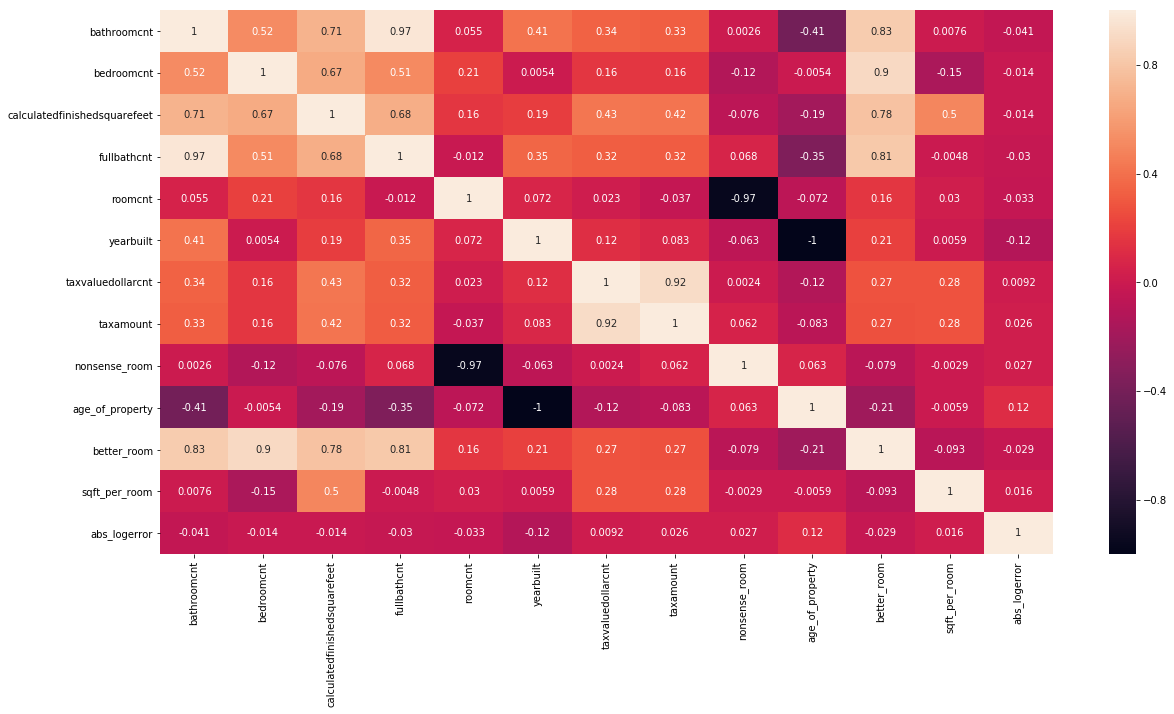

In [75]:
X2 = joined_nonull_2.drop(['parcelid', 'logerror', 'abs_logerror'], axis=1)
y2 = joined_nonull_2[['abs_logerror']]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, train_size=.60)

print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

train2 = pd.concat([X_train_2, y_train_2], axis=1)
test2 = pd.concat([X_test_2, y_test_2], axis=1)

print(train2.shape)
print(test2.shape)

plt.figure(figsize=(20,10))
sns.heatmap(train2.corr(), annot=True)

Initially it might look like error decreases for larger properties.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

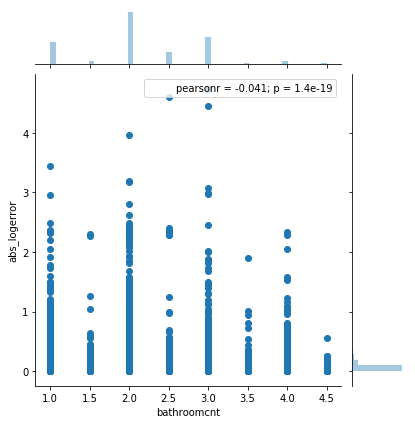

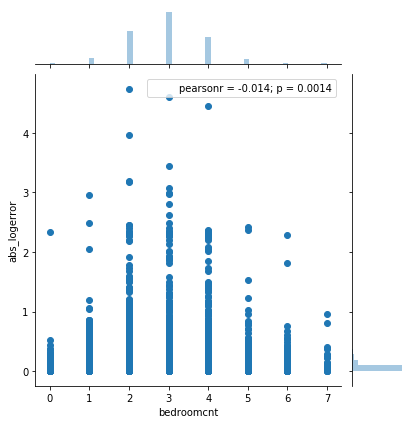

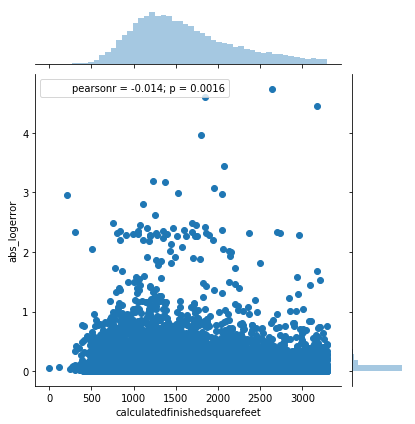

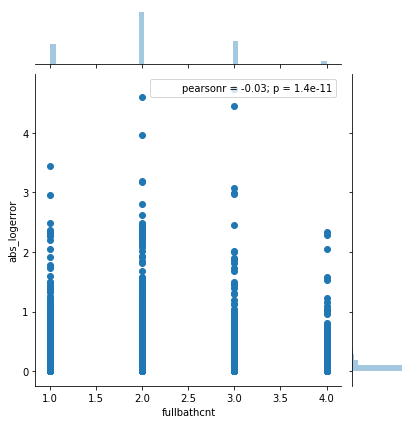

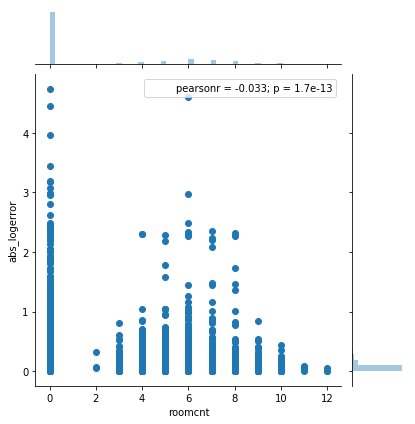

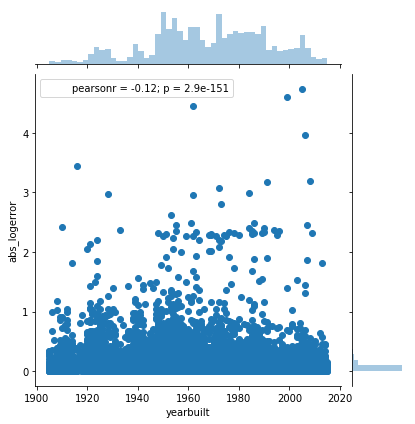

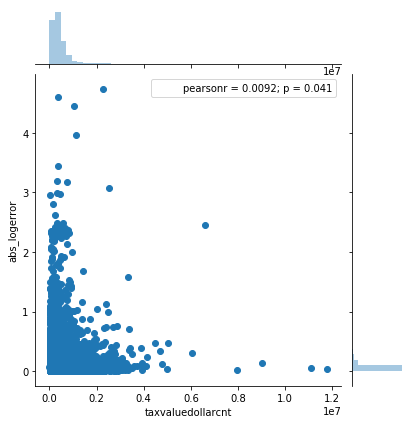

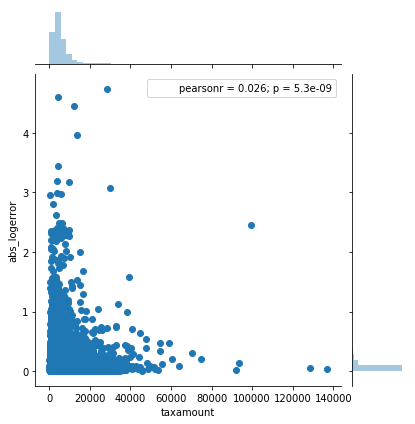

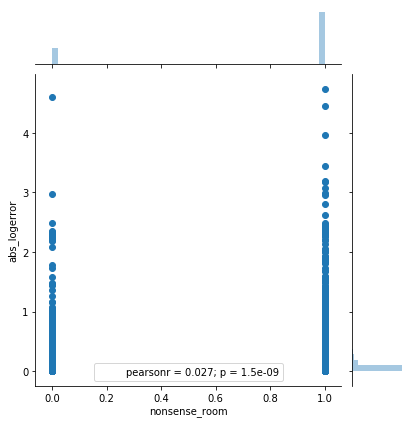

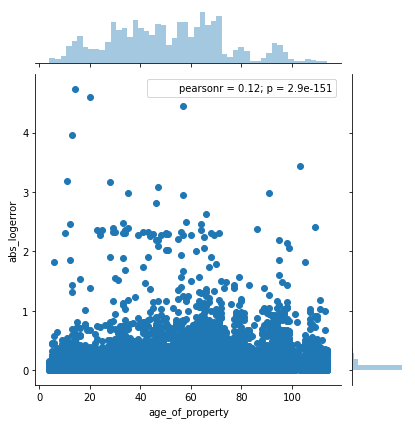

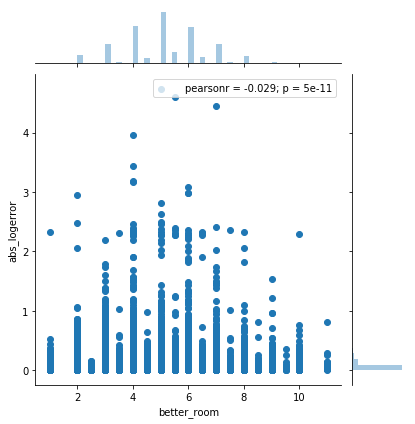

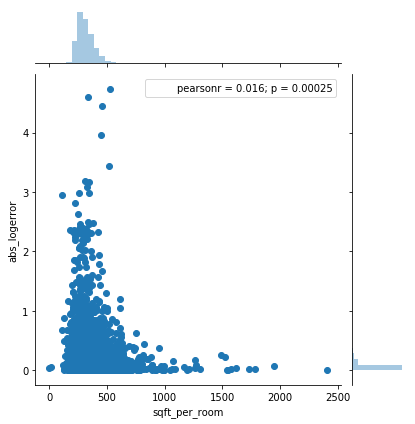

In [76]:
for column in X_train_2.drop('words_nonsense', axis=1):
    sns.jointplot(column, 'abs_logerror', data=train2).annotate(stats.pearsonr)
#     plt.ylim(0,.01)

`abs_logerror` decreases if the house is a newer house.

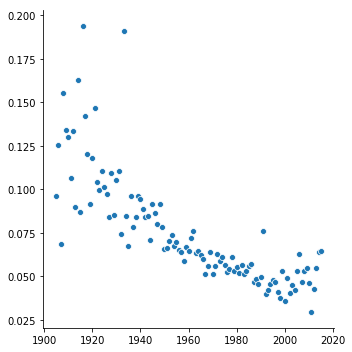

In [77]:
sns.relplot(data=train2.groupby('yearbuilt')['abs_logerror'].agg('mean'))

`abs_logerror` seems to be unrelated to bathroom count.

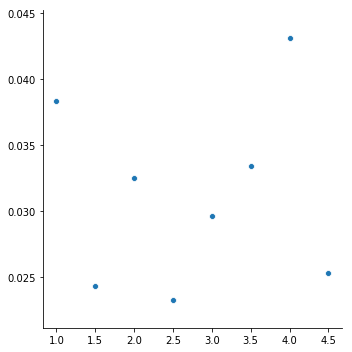

In [78]:
sns.relplot(data=train2.groupby('bathroomcnt')['abs_logerror'].agg('median'))

Exponential relationship between bedroom count and abs_logerror?

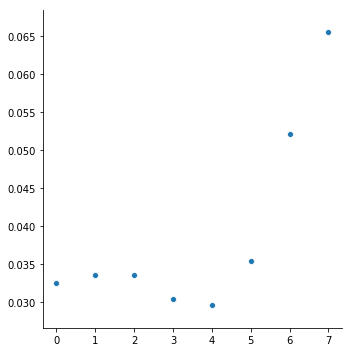

In [79]:
sns.relplot(data=train2.groupby('bedroomcnt')['abs_logerror'].agg('median'))

Binning square feet and looking at relationship with abs_logerror.

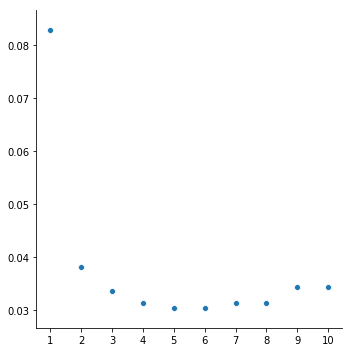

In [80]:
# sns.relplot(data=train2.groupby('calculatedfinishedsquarefeet')['abs_logerror'].agg('mean'))


sns.relplot(data=train2.groupby(pd.cut(train2.calculatedfinishedsquarefeet, 10, labels=['1','2','3','4','5','6','7','8','9','10']))['abs_logerror'].agg('median'))



In [81]:
train2.sample()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,nonsense_room,age_of_property,better_room,sqft_per_room,words_nonsense,abs_logerror
1623423,3.0,3.0,2312.0,3.0,0.0,1942.0,433491.0,5677.72,1,77.0,6.0,385.333333,Nonsense,0.1398


In [82]:
X_train_2.sample(10)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,nonsense_room,age_of_property,better_room,sqft_per_room,words_nonsense
104641,2.0,2.0,1369.0,2.0,4.0,1985.0,523950.0,6434.48,0,34.0,4.0,342.250000,Makes sense
1215510,1.0,3.0,946.0,1.0,6.0,1954.0,52207.0,996.24,0,65.0,4.0,236.500000,Makes sense
652398,2.0,2.0,1028.0,2.0,5.0,1963.0,286615.0,3270.90,0,56.0,4.0,257.000000,Makes sense
309760,2.5,3.0,1773.0,2.0,6.0,1990.0,100215.0,977.44,0,29.0,5.5,322.363636,Makes sense
2634212,2.0,3.0,1301.0,2.0,0.0,1981.0,209431.0,2575.55,1,38.0,5.0,260.200000,Nonsense
1964603,1.0,2.0,906.0,1.0,0.0,1941.0,181301.0,2378.88,1,78.0,3.0,302.000000,Nonsense
1814256,3.5,3.0,1669.0,3.0,0.0,2006.0,421176.0,6511.36,1,13.0,6.5,256.769231,Nonsense
2892771,2.0,2.0,1227.0,2.0,0.0,1991.0,675000.0,10849.80,1,28.0,4.0,306.750000,Nonsense
456429,1.0,3.0,1260.0,1.0,7.0,1950.0,302259.0,3770.36,0,69.0,4.0,315.000000,Makes sense
1604068,2.5,3.0,1593.0,2.0,0.0,1990.0,552189.0,7122.36,1,29.0,5.5,289.636364,Nonsense


## Data Modeling again

In [83]:
ols_model_2 = sm.OLS(y_train_2, X_train_2.drop('words_nonsense', axis=1))
fit2 = ols_model_2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           abs_logerror   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     85.35
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          2.30e-175
Time:                        20:55:41   Log-Likelihood:                 28084.
No. Observations:               49650   AIC:                        -5.615e+04
Df Residuals:                   49639   BIC:                        -5.605e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                     -0.0047      0.003     -1.605      0.108      -0.010       0.001
bedroomcnt                      -0.0004      0.002     -0.222      0.824      -0.004       0.003
calculatedfinishedsquarefeet  9.821e-06   4.39e-06      2.237      0.025    1.22e-06    1.84e-05
fullbathcnt                      0.0093      0.004      2.306      0.021       0.001       0.017
roomcnt                         -0.0046      0.001     -4.710      0.000      -0.006      -0.003
yearbuilt                     2.914e-05   4.57e-06      6.375      0.000    2.02e-05    3.81e-05
taxvaluedollarcnt            -2.489e-08   4.87e-09     -5.106      0.000   -3.44e-08   -1.53e-08
taxamount                     2.881e-06   3.87e-07      7.448      0.000    2.12e-06    3.64e-06
nonsense_room                   -0.0259      0.006     -4.129      0.000      -0.038      -0.014
age_of_property                  0.0007   3.11e-05     24.077      0.000       0.001       0.001
better_room                     -0.0050      0.002     -2.941      0.003      -0.008      -0.002
sqft_per_room                -2.373e-05   2.04e-05     -1.163      0.245   -6.37e-05    1.62e-05
==============================================================================
Omnibus:                    82213.285   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         89300053.282
Skew:                          11.091   Prob(JB):                         0.00
Kurtosis:                     209.577   Cond. No.                     2.62e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
lm1 = LinearRegression()

lm1.fit(X_train_2.drop(['bathroomcnt', 'bedroomcnt', 'sqft_per_room', 'words_nonsense'], axis=1), y_train_2)

lm1_train_pred = lm1.predict(X_train_2.drop(['bathroomcnt', 'bedroomcnt', 'sqft_per_room', 'words_nonsense'], axis=1))

MSE = mean_squared_error(y_train_2, lm1_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_2, lm1_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_2, lm1_train_pred)
print(f'R^2 is: {R2}')

print(lm1.coef_)

Mean squared error is: 0.018890081056824732
Median absolute error is: 0.039910961869734425
R^2 is: 0.01685718577233597
[[ 5.02040588e-06  5.59108761e-03 -4.59243545e-03 -3.64060776e-04
  -2.51088572e-08  2.88785032e-06 -2.56701982e-02  3.64060776e-04
  -4.01690691e-03]]


The best model based on r squared in this section is this first one, but it uses many variables.

In [85]:
lm2 = LinearRegression()

lm2.fit(X_train_2.drop(['words_nonsense', 'bathroomcnt', 'bedroomcnt', 'sqft_per_room', 'yearbuilt', 'taxvaluedollarcnt'], axis=1), y_train_2)

lm2_train_pred = lm2.predict(X_train_2.drop(['words_nonsense', 'bathroomcnt', 'bedroomcnt', 'sqft_per_room', 'yearbuilt', 'taxvaluedollarcnt'], axis=1))

MSE = mean_squared_error(y_train_2, lm2_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_2, lm2_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_2, lm2_train_pred)
print(f'R^2 is: {R2}')

Mean squared error is: 0.01890023114594082
Median absolute error is: 0.03995086292254146
R^2 is: 0.016328919792521823


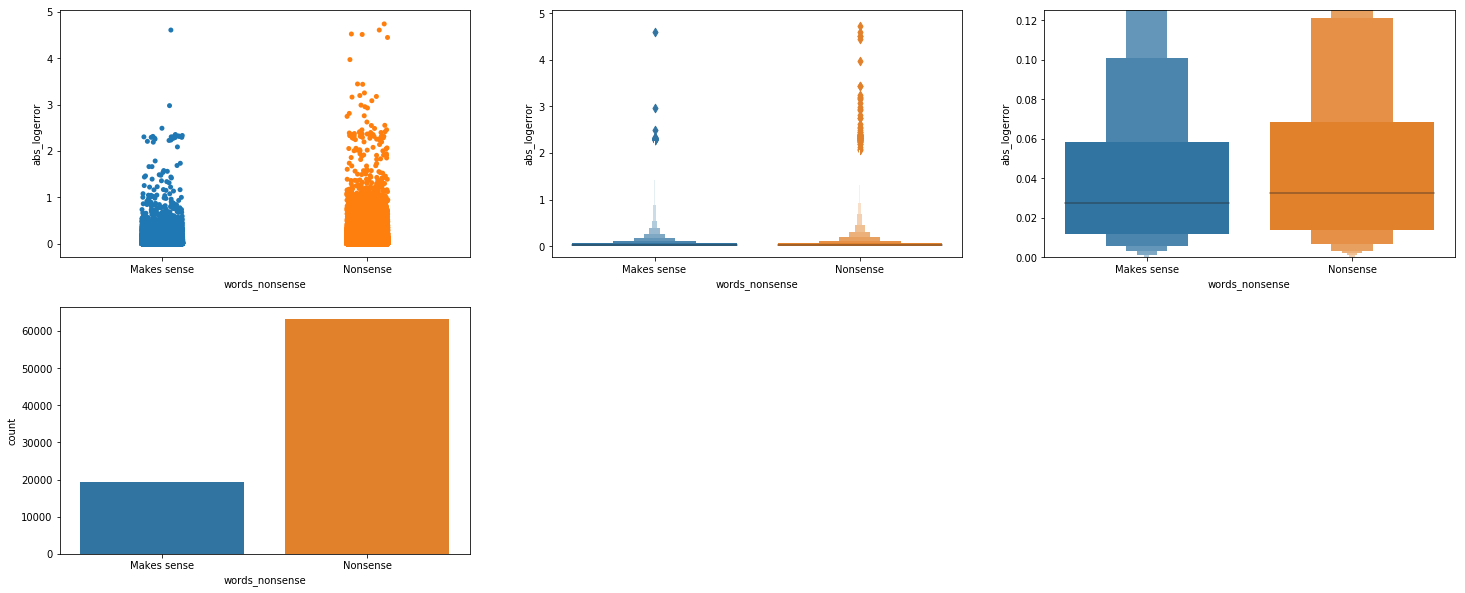

In [86]:
plt.figure(figsize=(25,10))


plt.subplot(231)
sns.stripplot('words_nonsense', 'abs_logerror', data=joined_nonull_2)

plt.subplot(232)
sns.boxenplot('words_nonsense', 'abs_logerror', data=joined_nonull_2)

plt.subplot(233)
sns.boxenplot('words_nonsense', 'abs_logerror', data=joined_nonull_2)
plt.ylim(0, 0.125)

plt.subplot(234)
sns.countplot('words_nonsense', data=joined_nonull_2)

# train.drop('words_nonsense', axis=1)

In [87]:
joined_nonull_2.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,8.275000e+04,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,8.275000e+04,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000
mean,1.297617e+07,2.156538,2.944109,1596.460459,2.093583,1.491517,1967.934151,3.902696e+05,5159.607375,0.010140,0.765511,51.065849,5.100647,0.065182,315.198624
std,2.552638e+06,0.737912,0.959667,589.305679,0.733619,2.781908,23.073432,3.212675e+05,4074.181568,0.154058,0.423682,23.073432,1.485258,0.139957,77.757843
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1905.000000,2.200000e+01,49.080000,-4.605000,0.000000,4.000000,1.000000,0.000000,0.666667
25%,1.155381e+07,2.000000,2.000000,1159.000000,2.000000,0.000000,1953.000000,1.916872e+05,2781.102500,-0.025300,1.000000,33.000000,4.000000,0.013100,261.800000
50%,1.254728e+07,2.000000,3.000000,1486.000000,2.000000,0.000000,1969.000000,3.280000e+05,4350.675000,0.005000,1.000000,50.000000,5.000000,0.031500,302.444444
75%,1.421204e+07,3.000000,4.000000,1939.000000,3.000000,0.000000,1986.000000,4.970588e+05,6383.652500,0.036300,1.000000,66.000000,6.000000,0.066100,355.250000
max,1.629608e+08,4.500000,7.000000,3297.000000,4.000000,12.000000,2015.000000,1.179352e+07,173218.070000,4.737000,1.000000,114.000000,11.000000,4.737000,2410.000000


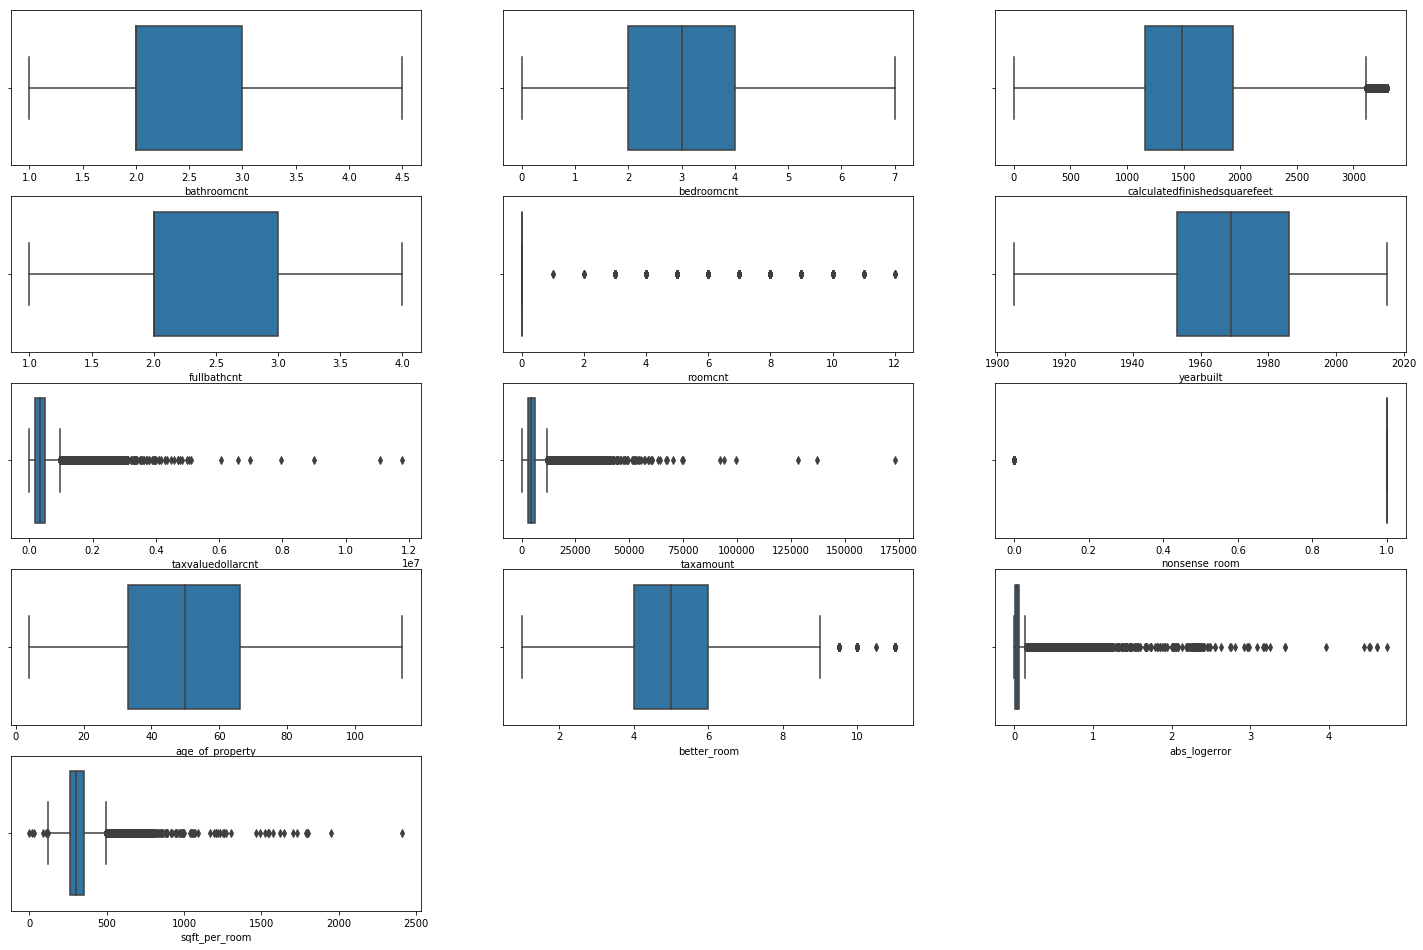

In [88]:
plt.figure(figsize=(25,20))

for i, column in enumerate(joined_nonull_2.drop(['parcelid', 'words_nonsense', 'logerror'], axis=1)):
    plt.subplot(6, 3, (i+1))
    sns.boxplot(joined_nonull_2[column])
  
    
plt.show()

Look at how variables related to property size and age affect the `abs_logerror`. In this model, error decreases as bedroom count increases. Error increases as bathroom count, square feet, and age increase. It also increases as tax amount increases and if the original value for `roomcnt` didn't make sense. This model will be chosen aas the best from this group.

In [89]:
lm3 = LinearRegression()

lm3.fit(X_train_2[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'nonsense_room', 'age_of_property', 'better_room']], y_train_2)

lm3_train_pred = lm3.predict(X_train_2[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'nonsense_room', 'age_of_property', 'better_room']])

lm3int = lm3.intercept_
print(f'The y intercept is: {lm3int[0]}')

lm3co = lm3.coef_
for i, coefficient in enumerate(lm3co[0]):
    print(f'The coefficient for variable {i+1} is: {coefficient}')


MSE = mean_squared_error(y_train_2, lm3_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_2, lm3_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_2, lm3_train_pred)
print(f'R^2 is: {R2}')

The y intercept is: 0.02264535268974148
The coefficient for variable 1 is: -0.00308395414408074
The coefficient for variable 2 is: 0.0021336089957825306
The coefficient for variable 3 is: 2.572403990185694e-06
The coefficient for variable 4 is: 1.1413156394252703e-06
The coefficient for variable 5 is: 0.004817986446950896
The coefficient for variable 6 is: 0.0007429442150287714
The coefficient for variable 7 is: -0.000950345148298807
Mean squared error is: 0.0189113773637479
Median absolute error is: 0.0400983658838297
R^2 is: 0.015748809844349343


In this model, error decreases as bedroom count increases. For all other variables, error increases with the variable. We would expect error to increase as property size increases, so one additional bedroom should increase error. Instead, there is a negative relationship. For other variables related to size, we see an expected positive relationship. Perhaps the Zestimate is better at valuing a bedroom versus a bathroom or any additional property space. So even though more space is being added to a property, if it is a bedroom, Zillow knows how to value it and so error does not increase. Worth noting is that the relationship seen earlier between `abs_error` and `bedroomcnt` looked exponential, not linear.

In [90]:
lm4 = LinearRegression()

lm4.fit(X_train_2[['bedroomcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'nonsense_room', 'age_of_property', 'better_room']], y_train_2)

lm4_train_pred = lm4.predict(X_train_2[['bedroomcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'nonsense_room', 'age_of_property', 'better_room']])

lm4int = lm4.intercept_
print(f'The y intercept is: {lm4int[0]}')

lm4co = lm4.coef_
for i, coefficient in enumerate(lm4co[0]):
    print(f'The coefficient for variable {i+1} is: {coefficient}')

# print(lm4co)

print('\n')


MSE = mean_squared_error(y_train_2, lm4_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_2, lm4_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_2, lm4_train_pred)
print(f'R^2 is: {R2}')


The y intercept is: 0.022645352689739266
The coefficient for variable 1 is: -0.005217563139863828
The coefficient for variable 2 is: 2.5724039901843487e-06
The coefficient for variable 3 is: 1.141315639425896e-06
The coefficient for variable 4 is: 0.004817986446950875
The coefficient for variable 5 is: 0.0007429442150287706
The coefficient for variable 6 is: 0.0011832638474842797


Mean squared error is: 0.018911377363747907
Median absolute error is: 0.040098365883829395
R^2 is: 0.01574880984434912


This model replaces `better_room` with `bathroomcnt` in an attempt to get a more precise idea of how additional space affects error. As expected, error increases with an additional bathroom. Unfortunately, this model performed slightly worse with a higher MAE. 

In [91]:
lm5 = LinearRegression()

lm5.fit(X_train_2[['bedroomcnt', 'bathroomcnt', 'age_of_property', 'calculatedfinishedsquarefeet', 'taxamount', 'nonsense_room']], y_train_2)

lm5_train_pred = lm5.predict(X_train_2[['bedroomcnt', 'bathroomcnt', 'age_of_property', 'calculatedfinishedsquarefeet', 'taxamount', 'nonsense_room']])

lm5int = lm5.intercept_
print(f'The y intercept is: {lm5int[0]}')

lm5co = lm5.coef_
for i, coefficient in enumerate(lm5co[0]):
    print(f'The coefficient for variable {i+1} is: {coefficient}')

print('\n')

MSE = mean_squared_error(y_train_2, lm5_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_2, lm5_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_2, lm5_train_pred)
print(f'R^2 is: {R2}')

The y intercept is: 0.02264535268973953
The coefficient for variable 1 is: -0.004034299292379339
The coefficient for variable 2 is: 0.001183263847484126
The coefficient for variable 3 is: 0.0007429442150287684
The coefficient for variable 4 is: 2.5724039901836812e-06
The coefficient for variable 5 is: 1.1413156394260155e-06
The coefficient for variable 6 is: 0.004817986446950888


Mean squared error is: 0.018911377363747903
Median absolute error is: 0.040098365883829284
R^2 is: 0.015748809844349232


In [92]:
lm6 = LinearRegression()

lm6.fit(X_train_2[['bathroomcnt', 'age_of_property', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'nonsense_room']], y_train_2)

lm6_train_pred = lm6.predict(X_train_2[['bathroomcnt', 'age_of_property', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'nonsense_room']])

print(lm6.intercept_)
print(lm6.coef_)

MSE = mean_squared_error(y_train_2, lm6_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_2, lm6_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_2, lm6_train_pred)
print(f'R^2 is: {R2}')


[0.01941566]
[[9.24421641e-05 7.14680916e-04 4.19829695e-08 9.83903327e-09
  6.45232117e-03]]
Mean squared error is: 0.018932398772150392
Median absolute error is: 0.04019004846389608
R^2 is: 0.01465474113423193


In [93]:
lm7 = LinearRegression()

lm7.fit(X_train_2[['roomcnt', 'bedroomcnt', 'bathroomcnt']], y_train_2)

lm7_train_pred = lm7.predict(X_train_2[['roomcnt', 'bedroomcnt', 'bathroomcnt']])

print(lm7.intercept_)
print(lm7.coef_)

MSE = mean_squared_error(y_train_2, lm7_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_2, lm7_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_2, lm7_train_pred)
print(f'R^2 is: {R2}')

[0.07944542]
[[-0.00170283  0.0025336  -0.00897552]]
Mean squared error is: 0.019159868626430022
Median absolute error is: 0.04339519241619445
R^2 is: 0.0028159696638662135


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

<Figure size 1440x1440 with 0 Axes>

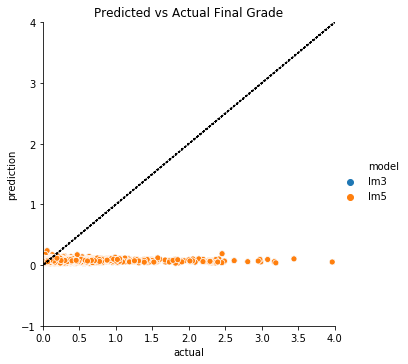

In [94]:
plt.figure(figsize=(20, 20))

pd.DataFrame({'actual': y_train_2.abs_logerror,
#               'lm1': lm1_train_pred.ravel(),
#               'lm2': lm2_train_pred.ravel(),
              'lm3': lm3_train_pred.ravel(),
#               'lm4': lm4_train_pred.ravel(),
              'lm5': lm4_train_pred.ravel()
#               'lm6': lm4_train_pred.ravel()
#               'lm7': lm4_train_pred.ravel()
             }).melt(id_vars=['actual'], var_name='model', value_name='prediction').pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')


plt.plot(y_train_2.abs_logerror, y_train_2.abs_logerror, c='black', ls=':')
plt.ylim(-1, 4)
plt.xlim(0, 4)
plt.title('Predicted vs Actual Final Grade')

In [95]:
# actual_x_and_y = pd.DataFrame({'bedroomcnt':X_test_2.bedroomcnt,
#                                'calculatedfinishedsquarefeet':X_test_2.calculatedfinishedsquarefeet,
#                                'taxamount':X_test_2.taxamount,
#                                'nonsense_room':X_test_2.nonsense_room,
#                                'age_of_property':X_test_2.age_of_property,
#                                'better_room':X_test_2.better_room,
#                                'abs_logerror':y_test_2.abs_logerror.ravel()})


# sns.relplot(data=actual_x_and_y, x='calculatedfinishedsquarefeet', y='abs_logerror', hue='taxamount', style='bedroomcnt', col='nonsense_room')
# # plt.plot(X_test.tenure, lm1_predict_test, label=function)
# # plt.legend()
# plt.title('Actual test values for tenure and total charges')


# Testing Model

In [96]:
lm4_test_pred = lm4.predict(X_test_2[['bedroomcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'nonsense_room', 'age_of_property', 'better_room']])

lm4_test_mse = mean_squared_error(lm4_test_pred, y_test_2)
print(f'MSE: {lm4_test_mse}')

lm4_test_mae = median_absolute_error(lm4_test_pred, y_test_2)
print(f'MAE: {lm4_test_mae}')

lm4_test_r2 = r2_score(lm4_test_pred, y_test_2)
print(f'R^2: {lm4_test_r2}')

MSE: 0.019798789293165114
MAE: 0.039924533731455616
R^2: -63.82375843294183


In [97]:
pred_and_actual = pd.DataFrame({'actual':y_test_2.abs_logerror,
                                'lm4_pred':lm4_test_pred.ravel()})

Residual Plot

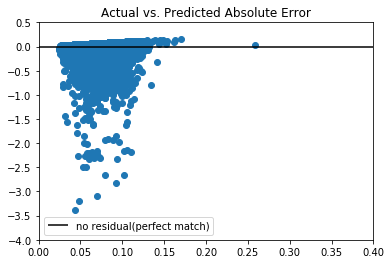

In [98]:
plt.scatter(lm4_test_pred, (lm4_test_pred-y_test_2))
plt.hlines(y=0, xmin=0, xmax=1, label='no residual(perfect match)')
plt.xlim(0,.4)
plt.ylim(-4,.5)
plt.title('Actual vs. Predicted Absolute Error')
plt.legend()

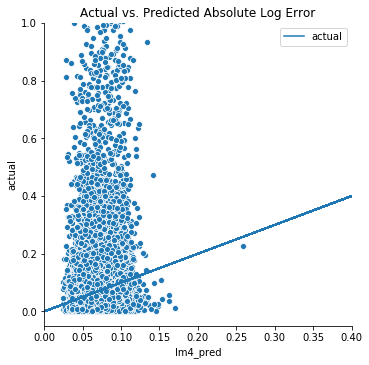

In [99]:
pred_and_actual = pd.DataFrame({'actual':y_test_2.abs_logerror,
                                'lm4_pred':lm4_test_pred.ravel()})

sns.relplot(data=pred_and_actual, y='actual', x='lm4_pred')
plt.plot(pred_and_actual.actual, pred_and_actual.actual)
plt.xlim(0,.4)
plt.ylim(-.05, 1)
plt.title('Actual vs. Predicted Absolute Log Error')
plt.legend()

In [100]:
f_regression(X_test_2[['bedroomcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'nonsense_room', 'age_of_property', 'better_room']], y_test_2.abs_logerror)




(array([  1.29469902,   1.63224316,   1.85766285,  34.43355264,
        566.08904134,  14.82247685]),
 array([2.55192020e-001, 2.01402030e-001, 1.72904055e-001, 4.45247753e-009,
        4.39664488e-124, 1.18341317e-004]))

My conclusion on this model is that it shouldn't go into production, at least not completely. We can look at the data exploration and see that there are some trends in the data. For example, error seems to go up for older properties and as property size increases. There is also a clear difference in error between properties that have a sensical room count and those that don't. This model can provide some guidance in how those variables are affecting error and by how much.

# Min Max Normalization

Here the data is normalized using min-max normalization. 

In [103]:
joined_nonull_3 = joined_nonull_2.drop(['parcelid', 'fullbathcnt', 'yearbuilt', 'words_nonsense'], axis=1)
joined_nonull_3.sample()
# joined_nonull_3.drop(['parcelid', 'fullbathcnt', 'yearbuilt', 'words_nonsense'], axis=1, inplace=True)
joined_nonull_2.sample()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room,words_nonsense
2749001,14727144,1.0,2.0,900.0,1.0,0.0,1983.0,326850.0,4108.06,0.01,1,36.0,3.0,0.01,300.0,Nonsense


In [104]:
normalized_zillow = (joined_nonull_3-joined_nonull_3.min())/(joined_nonull_3.max()-joined_nonull_3.min())
normalized_zillow.sample(10)

# That normalized all columns. Need to undo that for parcelid, yearbuilt, regionidzip

# normalized_zillow['parcelid'] = normalized_zillow.parcelid * (joined_nonull.parcelid.max()-joined_nonull.parcelid.min()) + joined_nonull.parcelid.min()
normalized_zillow['abs_logerror'] = normalized_zillow.abs_logerror * (joined_nonull_3.abs_logerror.max()-joined_nonull_3.abs_logerror.min()) + joined_nonull_3.abs_logerror.min()
# normalized_zillow['regionidzip'] = normalized_zillow.regionidzip * (joined.regionidzip.max()-joined.regionidzip.min()) + joined.regionidzip.min()
normalized_zillow.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
count,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000,82750.000000
mean,0.330439,0.420587,0.483903,0.124293,0.033090,0.029512,0.494021,0.765511,0.427871,0.410065,0.065182,0.130547
std,0.210832,0.137095,0.178848,0.231826,0.027241,0.023527,0.016491,0.423682,0.209758,0.148526,0.139957,0.032274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.285714,0.351138,0.000000,0.016252,0.015777,0.490227,1.000000,0.263636,0.300000,0.013100,0.108384
50%,0.285714,0.428571,0.450379,0.000000,0.027810,0.024840,0.493470,1.000000,0.418182,0.400000,0.031500,0.125254
75%,0.571429,0.571429,0.587860,0.000000,0.042145,0.036580,0.496821,1.000000,0.563636,0.500000,0.066100,0.147171
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.737000,1.000000


In [105]:
normalized_zillow.sample()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
1890505,0.571429,0.571429,0.481032,0.0,0.004526,0.004545,0.499176,1.0,0.563636,0.6,0.0583,0.093822


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(49650, 11)
(49650, 1)
(33100, 11)
(33100, 1)
(49650, 12)
(33100, 12)


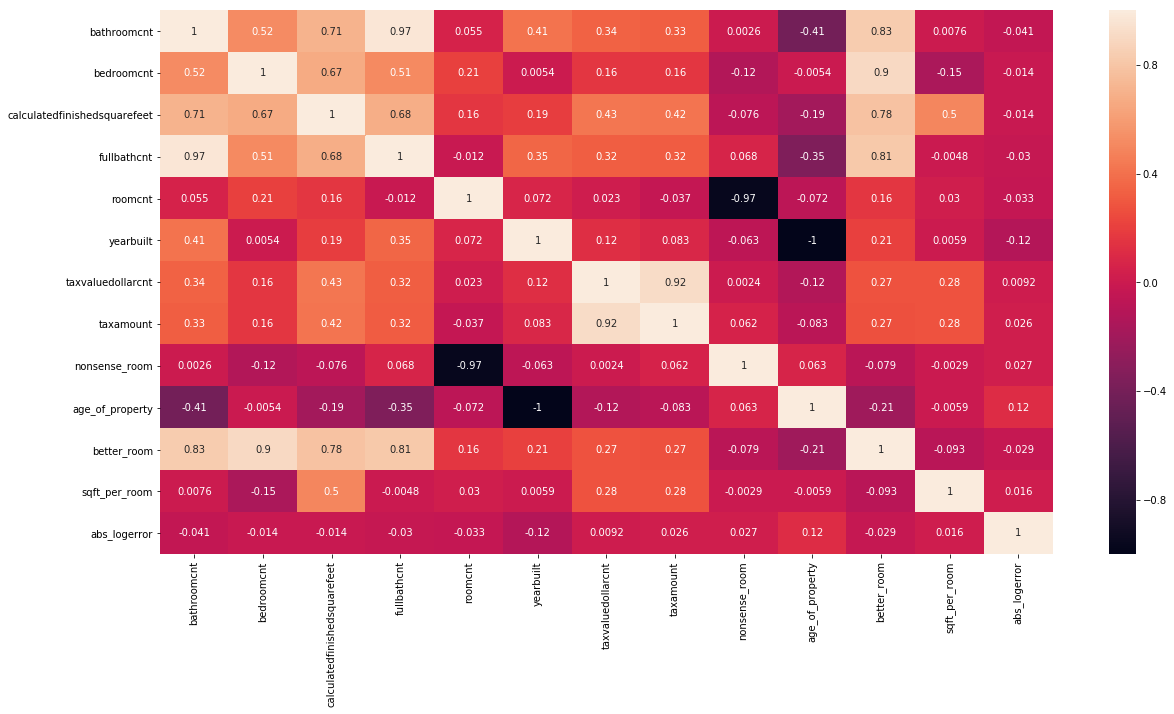

In [106]:
X3 = normalized_zillow.drop(['abs_logerror'], axis=1)
y3 = normalized_zillow[['abs_logerror']]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, train_size=.60)

print(X_train_3.shape)
print(y_train_3.shape)
print(X_test_3.shape)
print(y_test_3.shape)

train3 = pd.concat([X_train_3, y_train_3], axis=1)
test3 = pd.concat([X_test_3, y_test_3], axis=1)

print(train3.shape)
print(test3.shape)

plt.figure(figsize=(20,10))
sns.heatmap(train2.corr(), annot=True)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

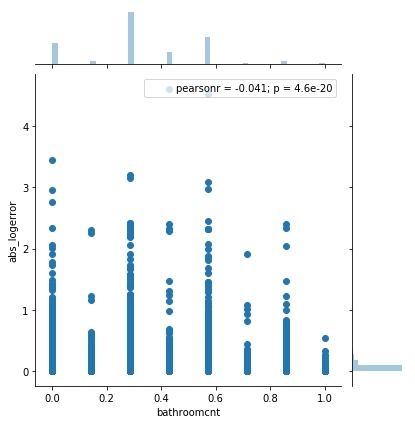

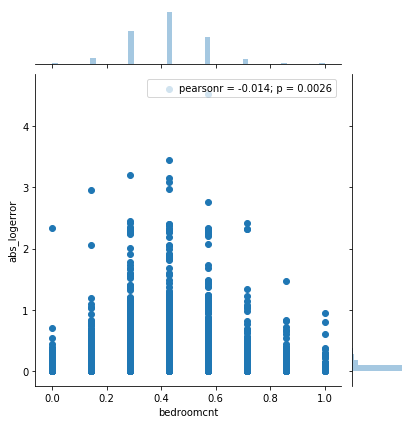

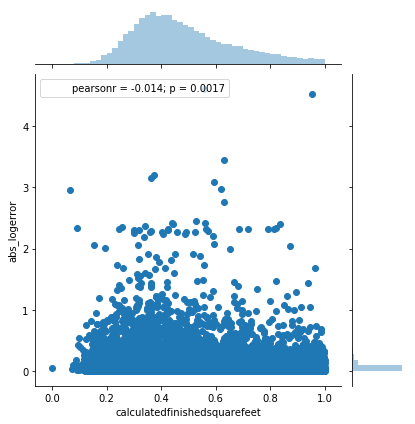

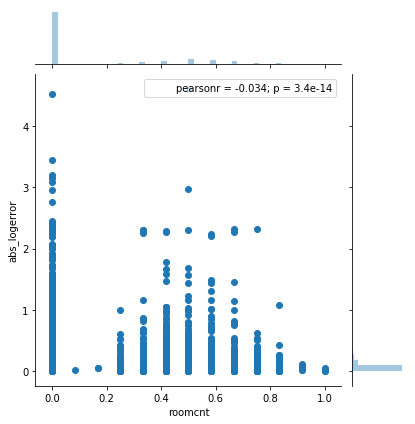

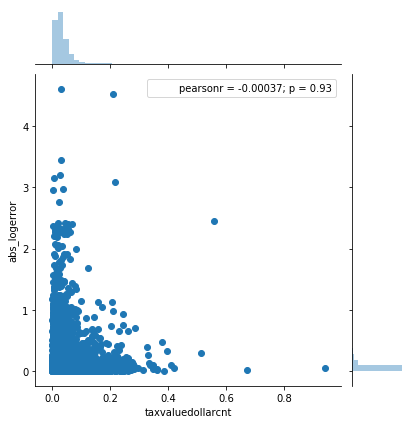

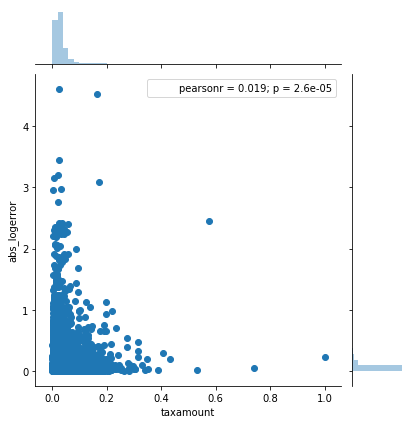

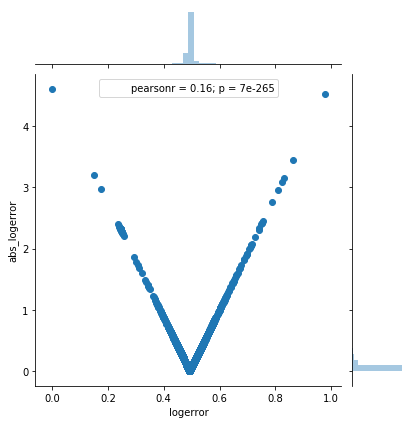

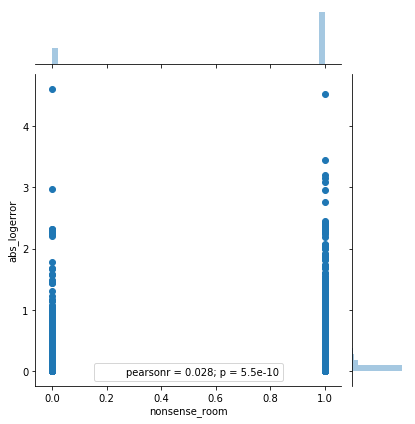

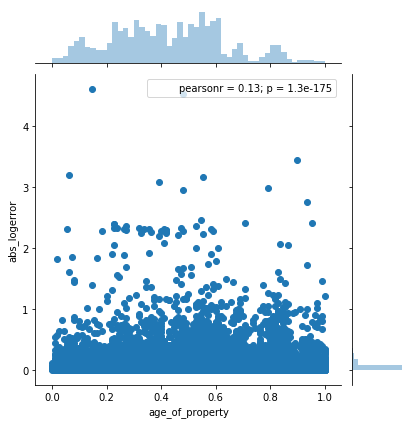

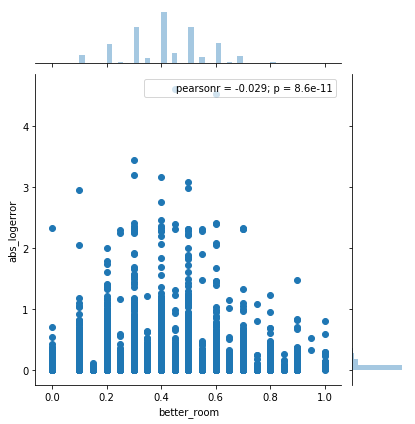

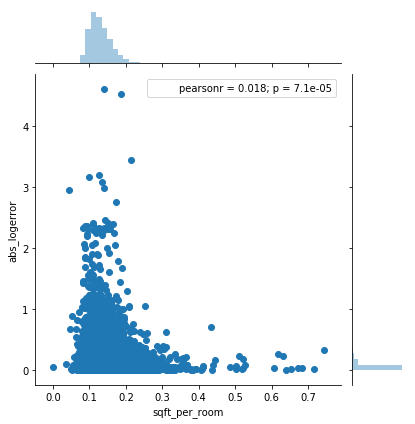

In [107]:
for column in X_train_3:
    sns.jointplot(column, 'abs_logerror', data=train3).annotate(stats.pearsonr)
#     plt.ylim(0,.01)

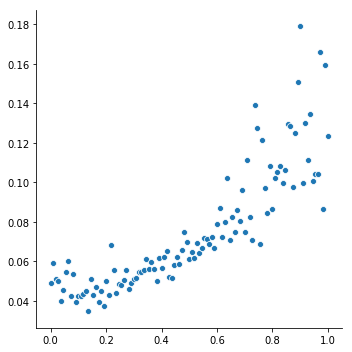

In [108]:
sns.relplot(data=train3.groupby('age_of_property')['abs_logerror'].agg('mean'))

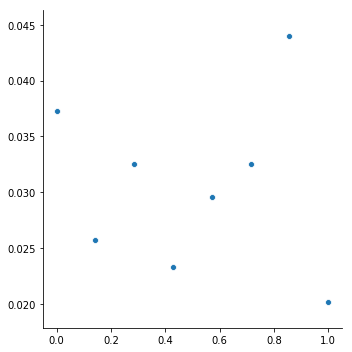

In [109]:
sns.relplot(data=train3.groupby('bathroomcnt')['abs_logerror'].agg('median'))

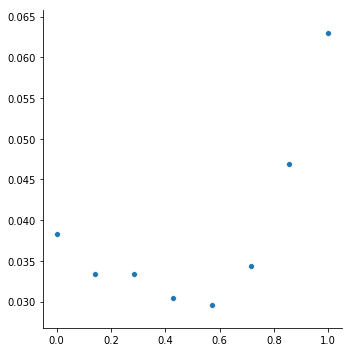

In [110]:
sns.relplot(data=train3.groupby('bedroomcnt')['abs_logerror'].agg('median'))

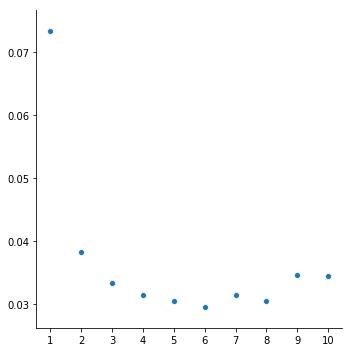

In [111]:
# sns.relplot(data=train2.groupby('calculatedfinishedsquarefeet')['abs_logerror'].agg('mean'))


sns.relplot(data=train3.groupby(pd.cut(train3.calculatedfinishedsquarefeet, 10, labels=['1','2','3','4','5','6','7','8','9','10']))['abs_logerror'].agg('median'))


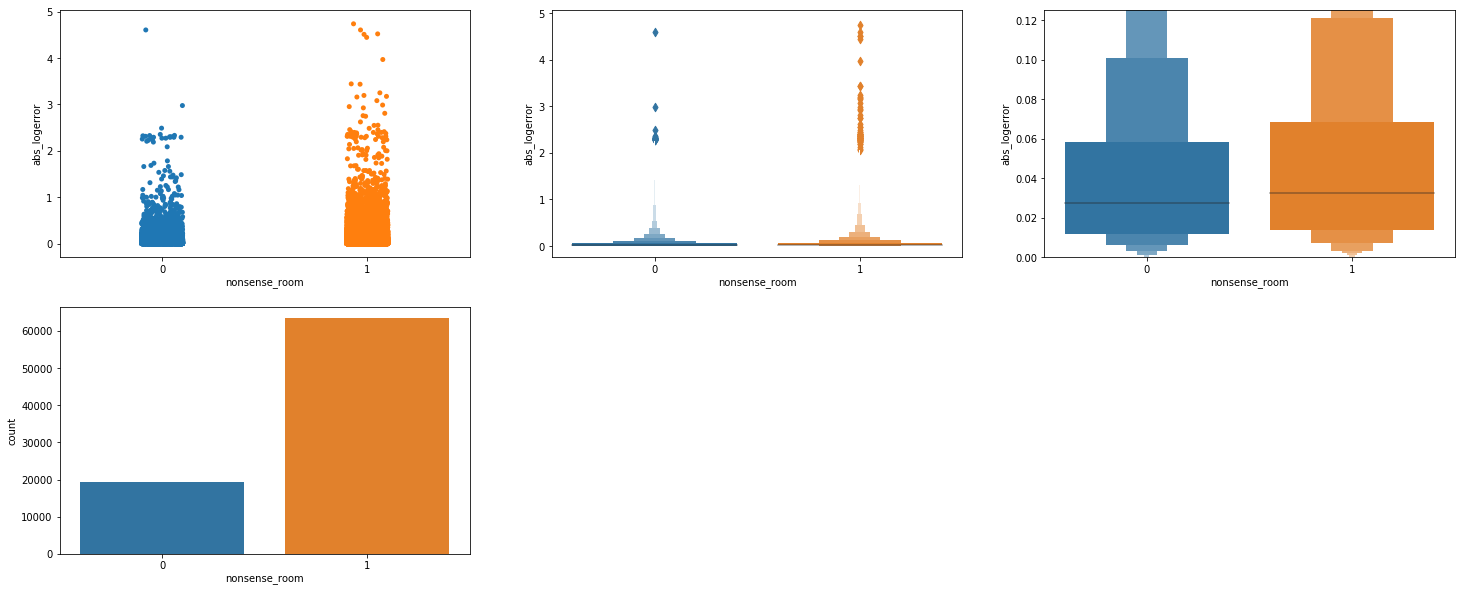

In [112]:
plt.figure(figsize=(25,10))


plt.subplot(231)
sns.stripplot('nonsense_room', 'abs_logerror', data=joined_nonull_3)

plt.subplot(232)
sns.boxenplot('nonsense_room', 'abs_logerror', data=joined_nonull_3)

plt.subplot(233)
sns.boxenplot('nonsense_room', 'abs_logerror', data=joined_nonull_3)
plt.ylim(0, 0.125)

plt.subplot(234)
sns.countplot('nonsense_room', data=joined_nonull_3)

# train.drop('words_nonsense', axis=1)

In [137]:
ols_model_3 = sm.OLS(y_train_3, X_train_3.drop(['logerror'], axis=1))
fit3 = ols_model_3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           abs_logerror   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     1286.
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        00:47:25   Log-Likelihood:                 30730.
No. Observations:               49650   AIC:                        -6.144e+04
Df Residuals:                   49640   BIC:                        -6.135e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                   7.911e+09   2.45e+10      0.322      0.747   -4.02e+10     5.6e+10
bedroomcnt                    1.582e+10   4.91e+10      0.322      0.747   -8.04e+10    1.12e+11
calculatedfinishedsquarefeet    -0.0336      0.011     -3.124      0.002      -0.055      -0.013
roomcnt                         -0.0056      0.008     -0.659      0.510      -0.022       0.011
taxvaluedollarcnt               -0.2785      0.050     -5.543      0.000      -0.377      -0.180
taxamount                        0.4052      0.057      7.075      0.000       0.293       0.517
nonsense_room                    0.0023      0.004      0.520      0.603      -0.006       0.011
age_of_property                  0.0867      0.003     27.054      0.000       0.080       0.093
better_room                   -2.26e+10   7.01e+10     -0.322      0.747    -1.6e+11    1.15e+11
sqft_per_room                    0.1956      0.035      5.560      0.000       0.127       0.265
==============================================================================
Omnibus:                    79319.343   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         71469743.115
Skew:                          10.341   Prob(JB):                         0.00
Kurtosis:                     187.715   Cond. No.                     1.92e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
lm1 = LinearRegression()

lm1.fit(X_train_3[['age_of_property', 'nonsense_room']], y_train_3)

lm1_train_pred = lm1.predict(X_train_3[['age_of_property', 'nonsense_room']])

lm1int = lm1.intercept_
print(f'The y intercept is: {lm1int[0]}')

lm1co = lm1.coef_
for i, coefficient in enumerate(lm1co[0]):
    print(f'The coefficient for variable {i+1} is: {coefficient}')


MSE = mean_squared_error(y_train_3, lm1_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_3, lm1_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_3, lm1_train_pred)
print(f'R^2 is: {R2}')

The y intercept is: 0.025635425440503803
The coefficient for variable 1 is: 0.07840665378535476
The coefficient for variable 2 is: 0.006182166718030802
Mean squared error is: 0.017003755286175627
Median absolute error is: 0.03953162538607842
R^2 is: 0.016347434573338093


In [115]:
lm2 = LinearRegression()

lm2.fit(X_train_3[['age_of_property', 'nonsense_room', 'calculatedfinishedsquarefeet', 'taxamount']], y_train_3)

lm2_train_pred = lm2.predict(X_train_3[['age_of_property', 'nonsense_room', 'calculatedfinishedsquarefeet', 'taxamount']])

lm2int = lm2.intercept_
print(f'The y intercept is: {lm2int[0]}')

lm2co = lm2.coef_
for i, coefficient in enumerate(lm2co[0]):
    print(f'The coefficient for variable {i+1} is: {coefficient}')


MSE = mean_squared_error(y_train_3, lm2_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_3, lm2_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_3, lm2_train_pred)
print(f'R^2 is: {R2}')

The y intercept is: 0.020689984068057193
The coefficient for variable 1 is: 0.07983670490050443
The coefficient for variable 2 is: 0.005629171777205122
The coefficient for variable 3 is: 0.0007316259173707069
The coefficient for variable 4 is: 0.14933068386410703
Mean squared error is: 0.016991167382238374
Median absolute error is: 0.03933076775947317
R^2 is: 0.01707563395005396


In [116]:
lm3 = LinearRegression()

lm3.fit(X_train_3[['age_of_property', 'nonsense_room', 'calculatedfinishedsquarefeet', 'taxamount', 'bathroomcnt', 'bedroomcnt']], y_train_3)

lm3_train_pred = lm3.predict(X_train_3[['age_of_property', 'nonsense_room', 'calculatedfinishedsquarefeet', 'taxamount', 'bathroomcnt', 'bedroomcnt']])

lm3int = lm3.intercept_
print(f'The y intercept is: {lm3int[0]}')

lm3co = lm3.coef_
for i, coefficient in enumerate(lm3co[0]):
    print(f'The coefficient for variable {i+1} is: {coefficient}')


MSE = mean_squared_error(y_train_3, lm3_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_3, lm3_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_3, lm3_train_pred)
print(f'R^2 is: {R2}')

The y intercept is: 0.024676985097300624
The coefficient for variable 1 is: 0.08482720223699317
The coefficient for variable 2 is: 0.004682769407445597
The coefficient for variable 3 is: 0.011372180384907817
The coefficient for variable 4 is: 0.12416227269999454
The coefficient for variable 5 is: 0.008420582142795006
The coefficient for variable 6 is: -0.02990049366616913
Mean squared error is: 0.01698253709088938
Median absolute error is: 0.03926105869334392
R^2 is: 0.017574888854805626


This model is the best perfoming of all tested in this section.

In [117]:
lm4 = LinearRegression()

lm4.fit(X_train_3[['age_of_property', 'calculatedfinishedsquarefeet', 'taxamount', 'better_room']], y_train_3)

lm4_train_pred = lm4.predict(X_train_3[['age_of_property', 'calculatedfinishedsquarefeet', 'taxamount', 'better_room']])

lm4int = lm4.intercept_
print(f'The y intercept is: {lm4int[0]}')

lm4co = lm4.coef_
for i, coefficient in enumerate(lm4co[0]):
    print(f'The coefficient for variable {i+1} is: {coefficient}')


MSE = mean_squared_error(y_train_3, lm4_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_3, lm4_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_3, lm4_train_pred)
print(f'R^2 is: {R2}')

The y intercept is: 0.027570591571202785
The coefficient for variable 1 is: 0.07951277448652348
The coefficient for variable 2 is: 0.012451460317498214
The coefficient for variable 3 is: 0.15159953981297578
The coefficient for variable 4 is: -0.01993729636650138
Mean squared error is: 0.016993413528495205
Median absolute error is: 0.03934890379755124
R^2 is: 0.016945696328001136


In [133]:
lm5 = LinearRegression()

lm5.fit(X_train_3[['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'age_of_property', 'sqft_per_room']], y_train_3)

lm5_train_pred = lm5.predict(X_train_3[['taxvaluedollarcnt', 'calculatedfinishedsquarefeet', 'taxamount', 'age_of_property', 'sqft_per_room']])

lm5int = lm5.intercept_
print(f'The y intercept is: {lm5int[0]}')

lm5co = lm5.coef_
for i, coefficient in enumerate(lm5co[0]):
    print(f'The coefficient for variable {i+1} is: {coefficient}')


MSE = mean_squared_error(y_train_3, lm5_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train_3, lm5_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train_3, lm5_train_pred)
print(f'R^2 is: {R2}')

The y intercept is: 0.02098312105177294
The coefficient for variable 1 is: -0.29172808915786125
The coefficient for variable 2 is: -0.003006482076828801
The coefficient for variable 3 is: 0.4446988986139348
The coefficient for variable 4 is: 0.07809147869857133
The coefficient for variable 5 is: 0.05741442000378018
Mean squared error is: 0.016982823264105742
Median absolute error is: 0.039305293534466754
R^2 is: 0.017558333981267715


In [135]:
lm3_test_pred = lm3.predict(X_test_3[['age_of_property', 'nonsense_room', 'calculatedfinishedsquarefeet', 'taxamount', 'bathroomcnt', 'bedroomcnt']])

lm3_test_mse = mean_squared_error(lm3_test_pred, y_test_3)
print(f'MSE: {lm4_test_mse}')

lm3_test_mae = median_absolute_error(lm3_test_pred, y_test_3)
print(f'MAE: {lm4_test_mae}')

lm3_test_r2 = r2_score(lm3_test_pred, y_test_3)
print(f'R^2: {lm4_test_r2}')

MSE: 0.019798789293165114
MAE: 0.039924533731455616
R^2: -63.82375843294183


R squared is negative, signaling that our model is very bad at predicting the data.

# Normalization after split

In [119]:
joined_nonull_3

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,abs_logerror,sqft_per_room
362,2.5,3.0,1264.0,5.0,191811.0,2015.06,0.0953,0,33.0,5.5,0.0953,229.818182
428,1.0,2.0,777.0,4.0,239679.0,2581.30,0.0198,0,29.0,3.0,0.0198,259.000000
470,2.0,3.0,1101.0,5.0,47853.0,591.64,0.0060,0,63.0,5.0,0.0060,220.200000
480,1.5,2.0,1554.0,5.0,62914.0,682.78,-0.0566,0,54.0,3.5,0.0566,444.000000
507,2.5,4.0,2415.0,8.0,554000.0,5886.92,0.0573,0,35.0,6.5,0.0573,371.538462
555,2.5,4.0,2882.0,8.0,289609.0,3110.44,0.0564,0,39.0,6.5,0.0564,443.384615
570,2.0,3.0,1772.0,6.0,526000.0,5632.20,0.0315,0,41.0,5.0,0.0315,354.400000
580,2.5,5.0,2632.0,8.0,571086.0,6109.94,0.0257,0,48.0,7.5,0.0257,350.933333
605,2.0,3.0,1292.0,6.0,462594.0,5026.40,0.0020,0,40.0,5.0,0.0020,258.400000
719,1.0,3.0,1385.0,6.0,268502.0,3217.06,-0.0576,0,69.0,4.0,0.0576,346.250000


(49650, 11)
(49650, 1)
(33100, 11)
(33100, 1)
(49650, 12)
(33100, 12)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


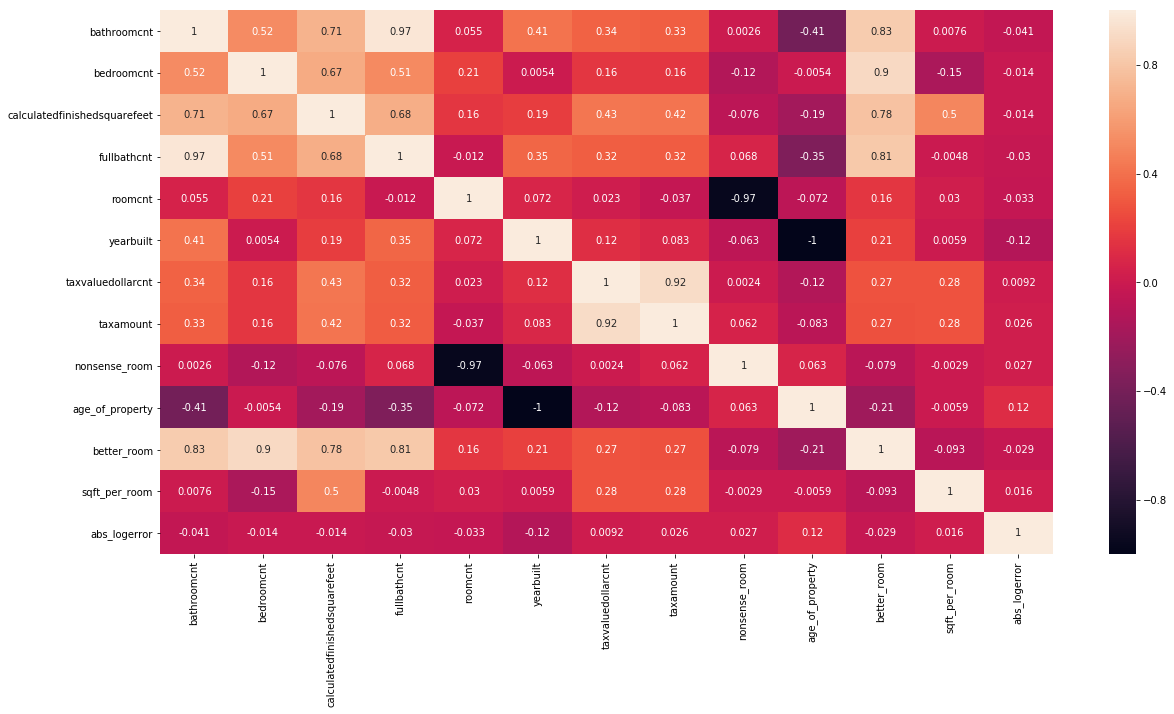

In [120]:
X4 = joined_nonull_3.drop(['abs_logerror'], axis=1)
y4 = joined_nonull_3[['abs_logerror']]

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, train_size=.60)

print(X_train_4.shape)
print(y_train_4.shape)
print(X_test_4.shape)
print(y_test_4.shape)

train4 = pd.concat([X_train_4, y_train_4], axis=1)
test4 = pd.concat([X_test_4, y_test_4], axis=1)

print(train4.shape)
print(test4.shape)

plt.figure(figsize=(20,10))
sns.heatmap(train2.corr(), annot=True)

In [121]:
normalized_train = (train4-train4.min())/(train4.max()-train4.min())
normalized_train.sample(10)

# That normalized all columns. Need to undo that for parcelid, yearbuilt, regionidzip

# normalized_zillow['parcelid'] = normalized_zillow.parcelid * (joined_nonull.parcelid.max()-joined_nonull.parcelid.min()) + joined_nonull.parcelid.min()
normalized_train['abs_logerror'] = normalized_train.abs_logerror * (train4.abs_logerror.max()-train4.abs_logerror.min()) + train4.abs_logerror.min()
# normalized_zillow['regionidzip'] = normalized_zillow.regionidzip * (joined.regionidzip.max()-joined.regionidzip.min()) + joined.regionidzip.min()
normalized_train.describe()



,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,sqft_per_room,abs_logerror
count,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000
mean,0.330859,0.420961,0.484351,0.124496,0.033099,0.029324,0.494023,0.765176,0.426938,0.410473,0.130558,0.064979
std,0.210271,0.136638,0.178655,0.231972,0.026873,0.023536,0.016718,0.423893,0.209437,0.148049,0.032285,0.142379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.285714,0.351442,0.000000,0.016355,0.015642,0.490227,1.000000,0.263636,0.300000,0.108329,0.013100
50%,0.285714,0.428571,0.450986,0.000000,0.027843,0.024670,0.493470,1.000000,0.418182,0.400000,0.125277,0.031500
75%,0.571429,0.571429,0.588164,0.000000,0.042140,0.036372,0.496821,1.000000,0.563636,0.500000,0.147126,0.065800
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.737000


In [122]:
normalized_train.sample()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,sqft_per_room,abs_logerror
293019,0.285714,0.428571,0.320789,0.416667,0.025958,0.021248,0.491533,0.0,0.518182,0.4,0.087631,0.0131


In [123]:
ols_model_3 = sm.OLS(normalized_train.abs_logerror, normalized_train.drop(['logerror', 'abs_logerror'], axis=1))
fit3 = ols_model_3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           abs_logerror   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     1134.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:56:50   Log-Likelihood:                 26741.
No. Observations:               49650   AIC:                        -5.346e+04
Df Residuals:                   49640   BIC:                        -5.337e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                   6.438e+09   2.67e+10      0.241      0.809   -4.59e+10    5.87e+10
bedroomcnt                    1.288e+10   5.34e+10      0.241      0.809   -9.17e+10    1.17e+11
calculatedfinishedsquarefeet    -0.0396      0.012     -3.418      0.001      -0.062      -0.017
roomcnt                         -0.0182      0.009     -1.982      0.048      -0.036      -0.000
taxvaluedollarcnt               -0.2306      0.055     -4.168      0.000      -0.339      -0.122
taxamount                        0.4099      0.063      6.533      0.000       0.287       0.533
nonsense_room                   -0.0037      0.005     -0.769      0.442      -0.013       0.006
age_of_property                  0.0875      0.003     25.177      0.000       0.081       0.094
better_room                  -1.839e+10   7.62e+10     -0.241      0.809   -1.68e+11    1.31e+11
sqft_per_room                    0.2229      0.038      5.878      0.000       0.149       0.297
==============================================================================
Omnibus:                    85037.289   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        117436658.991
Skew:                          11.831   Prob(JB):                         0.00
Kurtosis:                     240.080   Cond. No.                     1.93e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
lm1 = LinearRegression(fit_intercept=True)

lm1.fit(normalized_train[['age_of_property', 'nonsense_room', 'calculatedfinishedsquarefeet', 'taxamount', 'bathroomcnt', 'bedroomcnt']], normalized_train.abs_logerror)

lm1_train_pred = lm1.predict(normalized_train[['age_of_property', 'nonsense_room', 'calculatedfinishedsquarefeet', 'taxamount', 'bathroomcnt', 'bedroomcnt']])

lm1int = lm1.intercept_
print(f'The y intercept is: {lm1int}')

lm1co = lm1.coef_
for i, coefficient in enumerate(lm1co):
    print(f'The coefficient for variable {i+1} is: {coefficient}')


MSE = mean_squared_error(normalized_train.abs_logerror, lm1_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(normalized_train.abs_logerror, lm1_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(normalized_train.abs_logerror, lm1_train_pred)
print(f'R^2 is: {R2}')

The y intercept is: 0.021846706627428172
The coefficient for variable 1 is: 0.08586758291566017
The coefficient for variable 2 is: 0.005155830326556332
The coefficient for variable 3 is: 0.012247228077520008
The coefficient for variable 4 is: 0.17843999949869366
The coefficient for variable 5 is: 0.003115500425655185
The coefficient for variable 6 is: -0.02296624087964823
Mean squared error is: 0.01994361327641032
Median absolute error is: 0.03976570951036195
R^2 is: 0.016164062529153478


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

<Figure size 1440x1440 with 0 Axes>

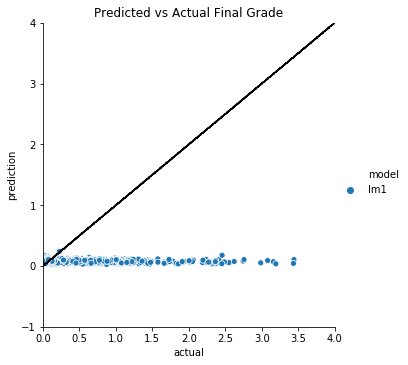

In [125]:
plt.figure(figsize=(20, 20))

pd.DataFrame({'actual': normalized_train.abs_logerror,
              'lm1': lm1_train_pred.ravel()
#               'lm2': lm2_train_pred.ravel(),
#               'lm3': lm3_train_pred.ravel(),
#               'lm4': lm4_train_pred.ravel(),
#               'lm5': lm4_train_pred.ravel()
#               'lm6': lm4_train_pred.ravel()
#               'lm7': lm4_train_pred.ravel()
             }).melt(id_vars=['actual'], var_name='model', value_name='prediction').pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')


plt.plot(normalized_train.abs_logerror, normalized_train.abs_logerror, c='black', ls=':')
plt.ylim(-1, 4)
plt.xlim(0, 4)
plt.title('Predicted vs Actual Final Grade')

In [126]:
normalized_train.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,roomcnt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,age_of_property,better_room,sqft_per_room,abs_logerror
count,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000,49650.000000
mean,0.330859,0.420961,0.484351,0.124496,0.033099,0.029324,0.494023,0.765176,0.426938,0.410473,0.130558,0.064979
std,0.210271,0.136638,0.178655,0.231972,0.026873,0.023536,0.016718,0.423893,0.209437,0.148049,0.032285,0.142379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.285714,0.351442,0.000000,0.016355,0.015642,0.490227,1.000000,0.263636,0.300000,0.108329,0.013100
50%,0.285714,0.428571,0.450986,0.000000,0.027843,0.024670,0.493470,1.000000,0.418182,0.400000,0.125277,0.031500
75%,0.571429,0.571429,0.588164,0.000000,0.042140,0.036372,0.496821,1.000000,0.563636,0.500000,0.147126,0.065800
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.737000


In [127]:


joined2.loc[(joined2.roomcnt == 0) & ((joined2.bedroomcnt > 0) | (joined2.bathroomcnt > 0)), 'roomcnt'] = 100

def room_fix(i):
    if i == 100:
        return 0
    else:
        return 1

joined2['sensical_roomcnt'] = joined2.roomcnt.apply(room_fix)

joined2.loc[(joined2.roomcnt == 100) & ((joined2.bedroomcnt > 0) | (joined2.bathroomcnt > 0)), 'roomcnt'] = 0

joined2.sample(20)

joined2['age_of_property'] = 2019 - joined2.yearbuilt

joined2.loc[(joined2.calculatedfinishedsquarefeet.isnull()) 
            & (joined2.bathroomcnt == float(0))
            & (joined2.bedroomcnt == float(0)), 'calculatedfinishedsquarefeet'] = 0

joined2.loc[(joined2.garagecarcnt.isnull()) 
            & (joined2.bathroomcnt == float(0))
            & (joined2.bedroomcnt == float(0)), 'garagecarcnt'] = 0

joined2.drop(['garagecarcnt', 'transactiondate'], axis=1, inplace=True)

joined2.loc[(joined2.bathroomcnt == float(0)) & (joined2.bedroomcnt == float(0)) & (joined2.fullbathcnt.isna()), 'fullbathcnt'] = 0

NameError: name 'joined2' is not defined

In [ ]:
joined2.loc[(joined2.basementsqft.isnull()) 
            & (joined2.bathroomcnt == float(0))
            & (joined2.bedroomcnt == float(0)), 'basementsqft'] = 0

In [ ]:
joined2.isna().sum()